In [1]:
import os, sys
import pandas as pd
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
import pdb
import scipy
from scipy.optimize import minimize
from scipy.stats import multivariate_normal
from tqdm.notebook import tqdm
from scipy.io import loadmat
from scipy.io import savemat
import math
from utils import *

In [4]:
"""
meta parameters
"""

gaussianFitMat = loadmat('matFilesForMelanie/gaussianFitSST_includingIntercept.mat')
sigmoidFitMat = loadmat('matFilesForMelanie/sigmoidFitSST_new.mat')
amplitude = np.array([0,30,50,60,70,80,90],dtype=np.float128)
x_sampled = np.arange(0,90,2) 

responseMatrix = loadmat('Across_many_datasets/som/TrialAverageActivityAllCellsPopulationTdelay_Fitting.mat')
num_cells = responseMatrix['Ind_CellSelectionIncludingSEM'].shape[0]
    
gaussNoLight = gaussianFitMat['gaussNoLightSST']
gaussMidLight = gaussianFitMat['gaussMidLightSST']
gaussHighLight = gaussianFitMat['gaussHighLightSST']
sigmoidNoLight = sigmoidFitMat['sigmoidNoLightSST']
sigmoidMidLight = sigmoidFitMat['sigmoidMidLightSST']
sigmoidHighLight = sigmoidFitMat['sigmoidHighLightSST']
def selectingIndices(lightCondition):
    if lightCondition == 'no':
        indices = [0,3,6,9,12,15,18]
    elif lightCondition == 'mid':
        indices = [1,4,7,10,13,16,19]
    else:
        indices = [2,5,8,11,14,17,20]
    return indices
    

dataset 0 cell 0 params [1.2321845219867853, 22.779590771890813, 10.243672999741351] MI 0.026324639168287794 Interpolated error 0.06720635148916049


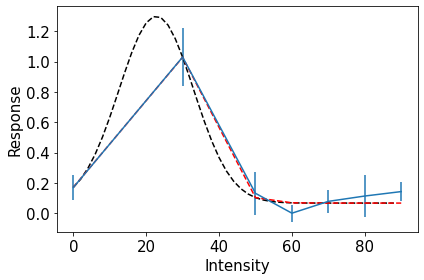

dataset 0 cell 5 params [0.24415996560766914, 66.53878824558765, 4.693624275163475] MI 0.12504728087150652 Interpolated error 0.015709676375833218


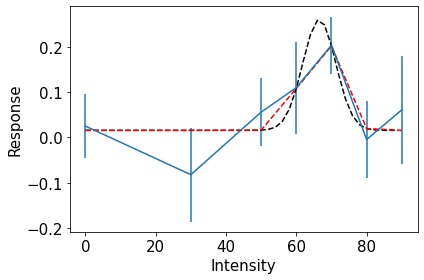

dataset 0 cell 13 params [0.23257592196590715, 59.633375246042895, 3.3000614235923207] MI 0.5107843872742688 Interpolated error -0.051229375742722745


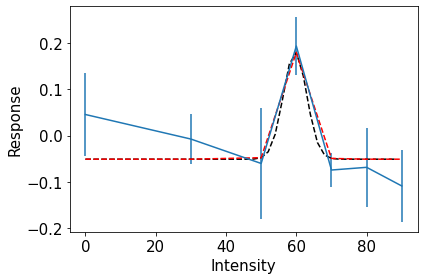

dataset 0 cell 17 params [0.7762694426979272, 47.349809843365776, 11.058905463806493] MI 0.15186000780627212 Interpolated error 0.11496884207668219


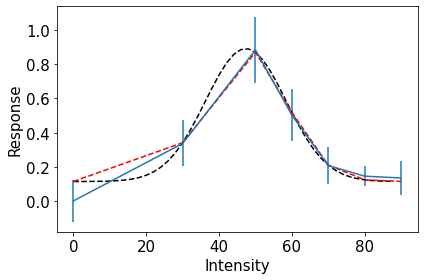

dataset 0 cell 26 params [0.2801530162545651, 59.450070190568354, 20.53143783214395] MI 0.6545306043183181 Interpolated error -0.04596472124820839


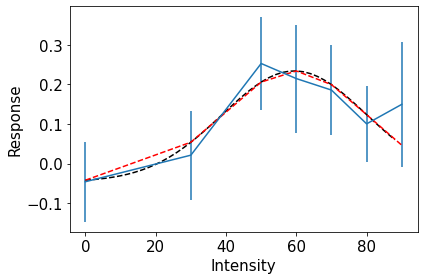

dataset 0 cell 38 params [0.2718233041850456, 24.68894054758628, 25.790081351903208] MI 0.6229428892992986 Interpolated error -0.04804861124930682


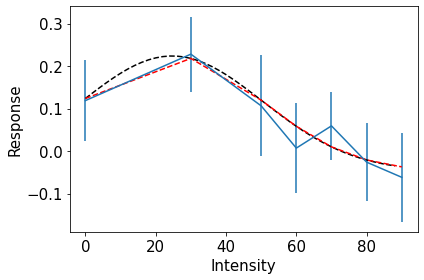

dataset 0 cell 42 params [0.11767240412952434, 49.16822231356965, 8.95642661199352] MI 0.002020486700132429 Interpolated error -0.05330023190240095


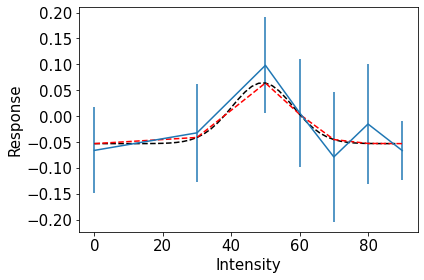

dataset 0 cell 51 params [0.2610431173221563, 57.61380122069113, 5.967289847973487] MI 0.058529657460630734 Interpolated error 0.0029487837795087466


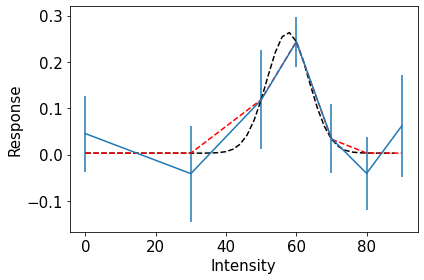

dataset 0 cell 57 params [0.3170069375469994, 40.275033942475275, 8.05949438586504] MI 0.021066759088071346 Interpolated error 0.10282579704959215


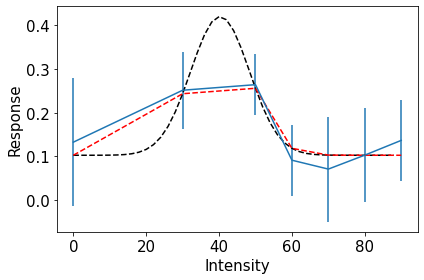

dataset 0 cell 59 params [-0.21663421302702865, 67.67981741604267, 10.200081842346554] MI 0.4225900189672198 Interpolated error 0.13650422459326395


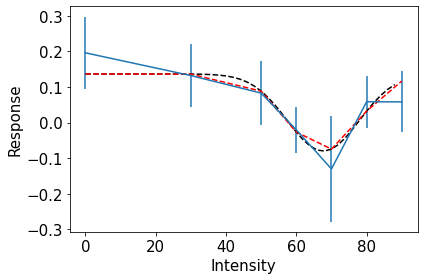

dataset 0 cell 69 params [0.30336757368900785, 17.58013298747003, 12.316042287100904] MI 0.46259518885137074 Interpolated error 0.049285231070424006


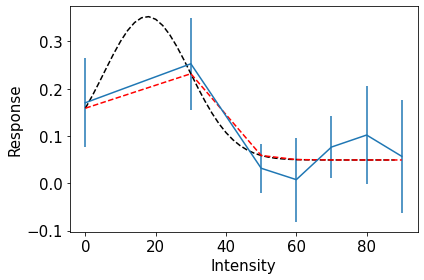

dataset 0 cell 73 params [0.22077026437518138, 55.46499694491433, 5.5895911513440595] MI 0.3232149073249719 Interpolated error -0.009911242390481557


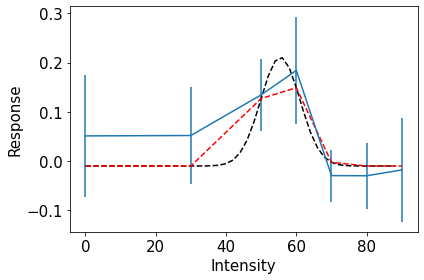

dataset 1 cell 32 params [0.6542365738816562, 60.866996378543305, 27.572981892158552] MI 0.35186712703090695 Interpolated error -0.7586430174668559


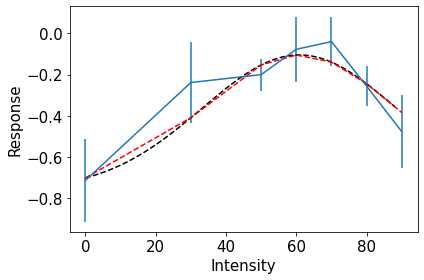

dataset 1 cell 36 params [0.21004607018557672, 55.67765817297668, 10.759087860595397] MI 0.321768173446394 Interpolated error -0.1315549349286079


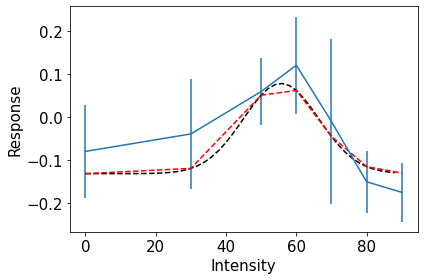

dataset 1 cell 40 params [-0.2344585811643474, 61.298178620233315, 14.852324086523188] MI 0.202718579263627 Interpolated error 0.16755032423952443


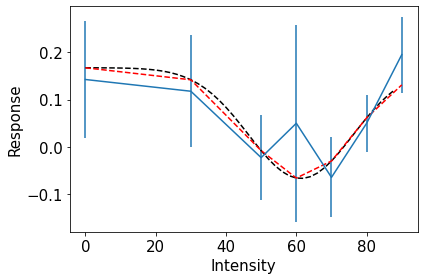

dataset 1 cell 55 params [0.18147584709816386, 75.5998404078641, 10.72797720918088] MI 0.4495864083177544 Interpolated error 0.024902338617438385


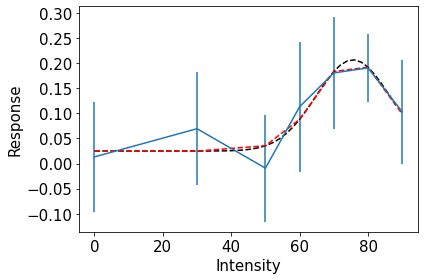

dataset 1 cell 56 params [0.25617751009487927, 57.53940131555083, 16.1397916162578] MI 0.06576655309232475 Interpolated error -0.04597577944561509


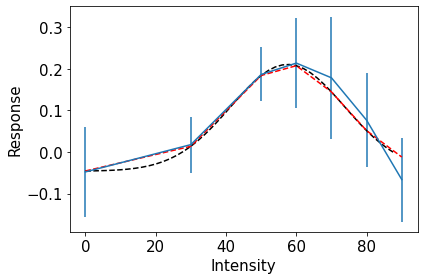

dataset 1 cell 57 params [0.2811609620474845, 58.61507798503216, 6.901156847504504] MI 0.41183743529001865 Interpolated error -0.07473876789711505


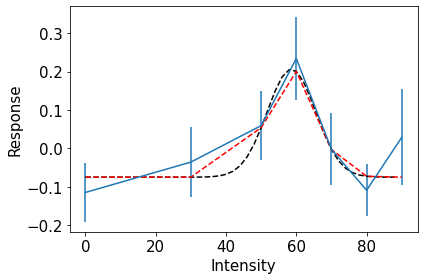

dataset 1 cell 58 params [0.40406645567195204, 31.07207523509995, 10.148922276951255] MI 0.04728335992295344 Interpolated error -0.26196557261574666


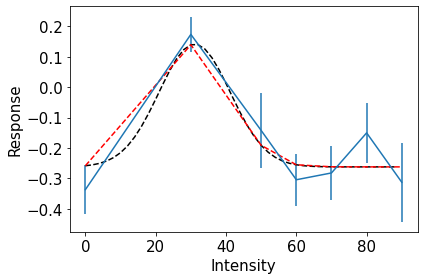

dataset 1 cell 61 params [0.5244164510523397, 46.21769758304528, 40.40431134012669] MI 0.3131807381257695 Interpolated error -0.6880820362062037


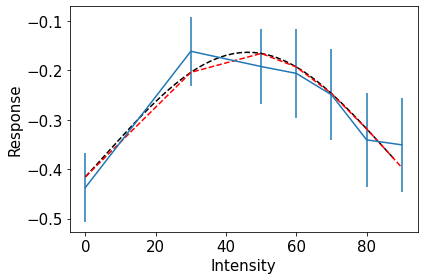

dataset 1 cell 63 params [0.6373973313370452, 32.41482340116984, 3.996727249735643] MI 0.18636262290955538 Interpolated error 0.08919727486845551


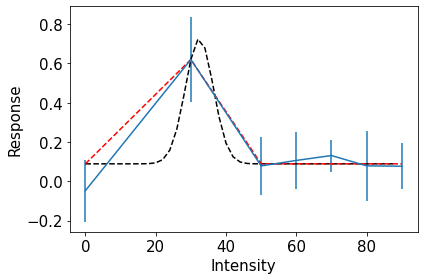

dataset 1 cell 69 params [2.0215862375324236, 28.53004540132743, 6.75402278004296] MI 0.023418217934368053 Interpolated error 0.12331888658059333


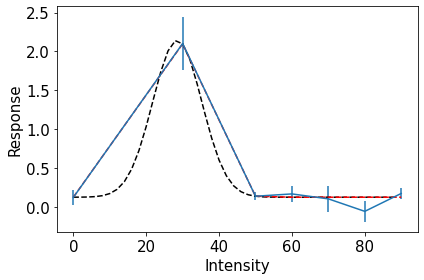

dataset 1 cell 83 params [0.2730371252940766, 73.15636479554027, 6.100325733383602] MI 0.14022834944302398 Interpolated error -0.045748168756950966


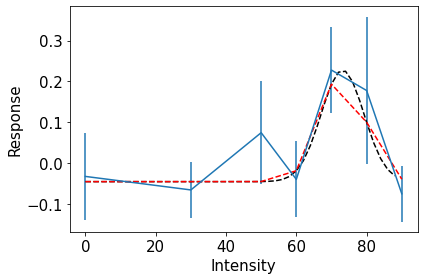

dataset 1 cell 86 params [-0.24445249607447844, 19.66058900781362, 9.186459572586731] MI 0.021692287615091666 Interpolated error 0.003341431731323147


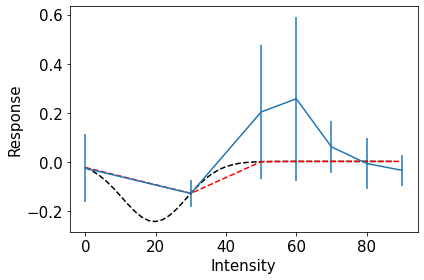

dataset 1 cell 88 params [0.8950437593697298, 23.655125273311203, 11.380739382045116] MI 0.058373169931274685 Interpolated error -0.027962374957775933


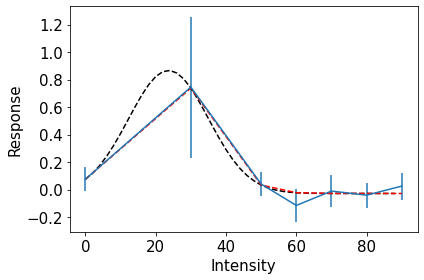

dataset 1 cell 91 params [0.2853058967960547, 63.25725848050409, 5.721683660159209] MI 0.0609065659842512 Interpolated error -0.0551321672414415


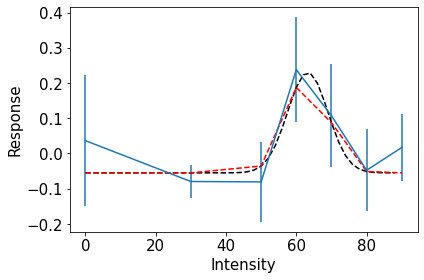

dataset 1 cell 99 params [0.27488878983846443, 29.98588887169454, 3.391473440560314] MI 0.08226594547339187 Interpolated error -0.04597906782463904


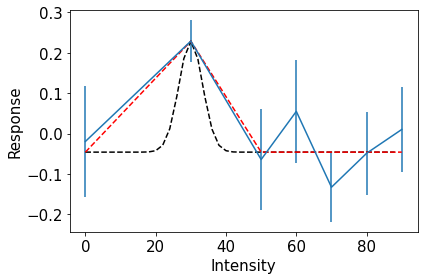

dataset 1 cell 100 params [0.22313796423322751, 31.44497622141196, 10.089648051933622] MI 0.30330216821945516 Interpolated error -0.08593471751286931


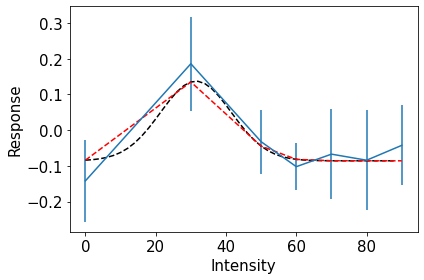

dataset 1 cell 116 params [-0.21830075865565327, 27.5851245215594, 4.007400652008837] MI 0.4370390024301259 Interpolated error 0.00012851270633161113


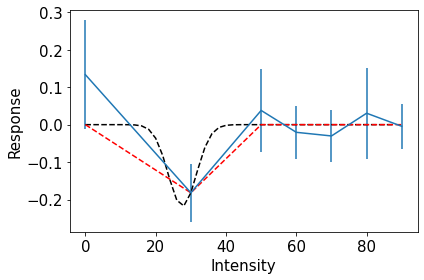

dataset 1 cell 121 params [-0.341852099841298, 34.87326648348759, 11.846613860068206] MI 0.17986692309886906 Interpolated error 0.19524247322141344


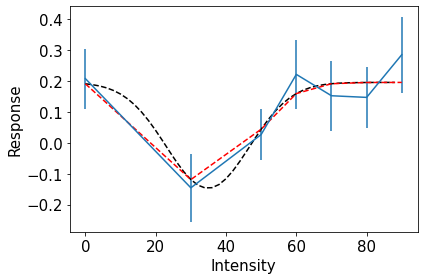

dataset 1 cell 125 params [-0.21048162678324364, 54.72644767618331, 8.459044493049907] MI 0.397381982918159 Interpolated error 0.006979891739785709


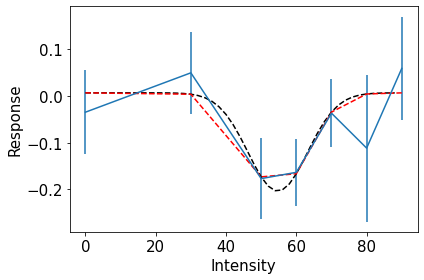

dataset 2 cell 0 params [0.3854333912807876, 62.47539399809941, 4.059256481875148] MI 0.3890291913837305 Interpolated error 0.017347119206812856


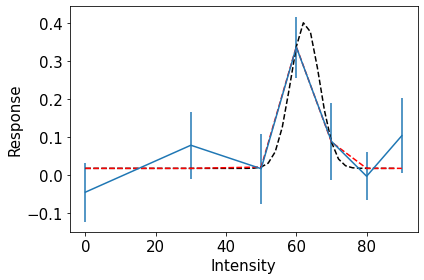

dataset 2 cell 13 params [0.13978183367152164, 67.26725910600058, 6.698224970309481] MI 0.03951454234656041 Interpolated error -0.08694693072376028


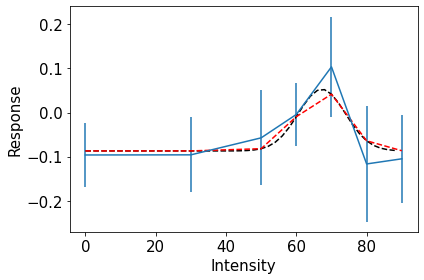

dataset 2 cell 26 params [-0.17430872022237537, 22.99571541103819, 15.973011251862218] MI 0.11055549365662452 Interpolated error -0.057276219508195


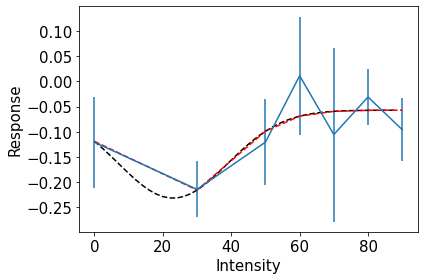

dataset 2 cell 30 params [0.44528304174766203, 64.62512385099507, 5.3126733369479116] MI 0.6405520776501638 Interpolated error -0.10679287094019896


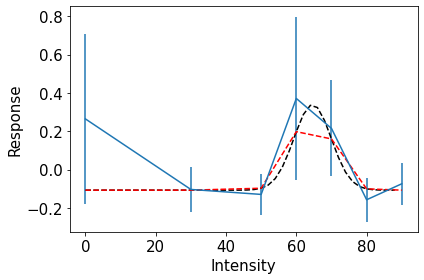

dataset 2 cell 45 params [0.19148943108555522, 39.85194440627513, 10.124215181558473] MI 0.1746231475944934 Interpolated error 0.0106804469323341


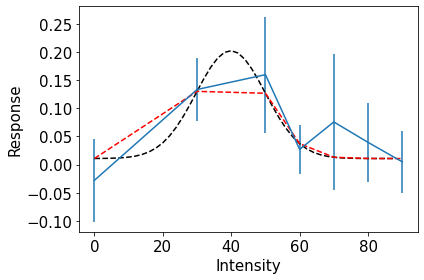

dataset 2 cell 49 params [0.19273061341749537, 58.461435436911735, 23.397264219961038] MI 0.4282900167970134 Interpolated error -0.36251976209840864


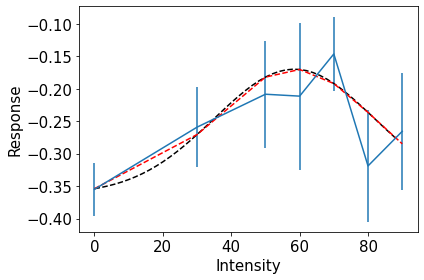

dataset 2 cell 53 params [-0.1939737501131009, 66.39395192007562, 9.051074617313732] MI 0.07173942919645297 Interpolated error 0.07271956047657534


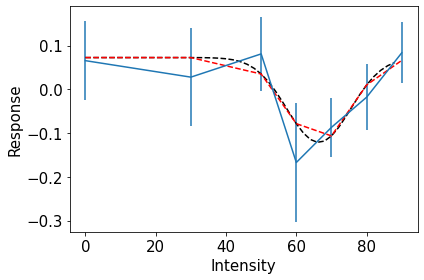

dataset 2 cell 61 params [-0.17498116865486013, 56.545984711824985, 4.615353059102675] MI 0.5191378810146242 Interpolated error -0.03774570402017341


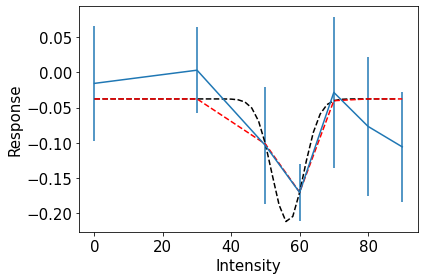

dataset 2 cell 67 params [0.24396533091577827, 71.16346217497696, 7.974562485054415] MI 0.4404845958482717 Interpolated error -0.01097205146875263


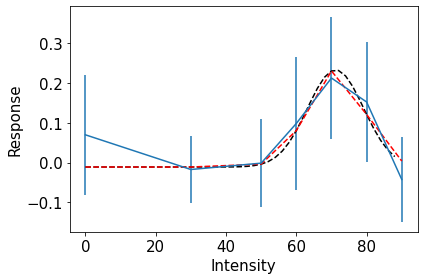

dataset 2 cell 70 params [0.22006127152465912, 63.54173595540198, 6.480124895775291] MI 0.0011492195957399645 Interpolated error -0.035329700015696304


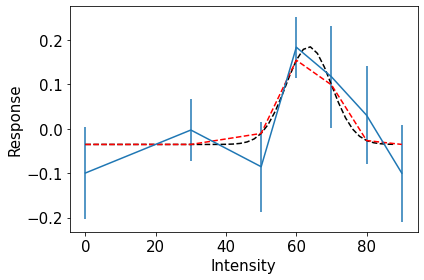

dataset 2 cell 86 params [0.1142554266181583, 45.353029297808156, 15.495220490515562] MI 0.07465324481166408 Interpolated error -0.07974973396006224


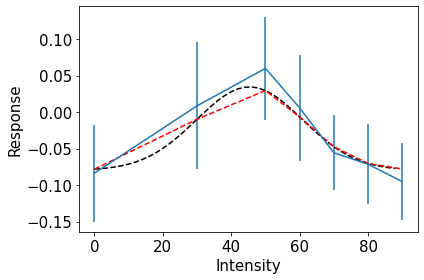

dataset 2 cell 87 params [-0.15523328368556705, 66.99463679333039, 6.650359031201034] MI 0.10390131827631027 Interpolated error 0.0821880532813443


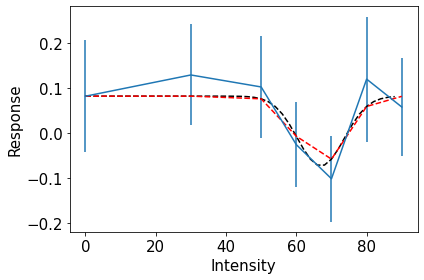

dataset 2 cell 92 params [0.1345140356293196, 57.27858124617667, 8.621733914365086] MI 0.20962125201875254 Interpolated error -0.09009029091702216


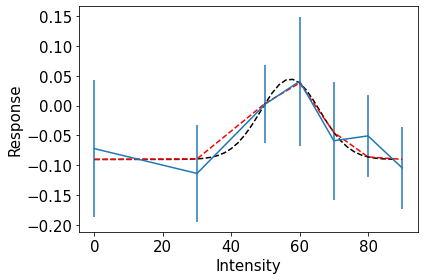

dataset 2 cell 94 params [-0.1378364858643359, 29.691407564403168, 19.96287501515124] MI 0.42148204207332013 Interpolated error -0.005081365184992753


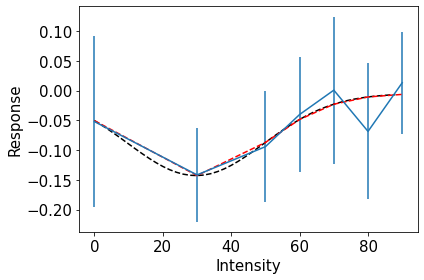

dataset 2 cell 95 params [0.2349952220059236, 48.95112842931257, 10.38743186733829] MI 0.21699724883497246 Interpolated error 0.09875110237043279


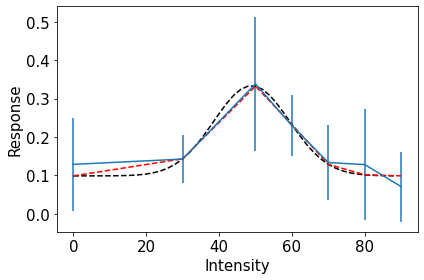

dataset 2 cell 96 params [0.13334127210177152, 69.22965540181241, 5.8120742614092356] MI 0.03431284664179345 Interpolated error -0.0034674515886265866


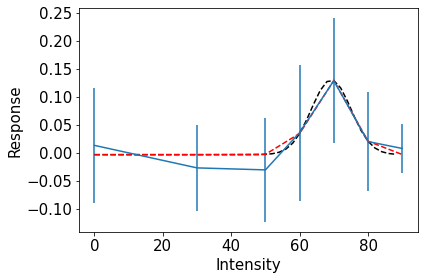

dataset 2 cell 100 params [-0.19288893855594016, 65.46855705707857, 5.37436296177835] MI 0.1267404625507832 Interpolated error 0.13800480964882356


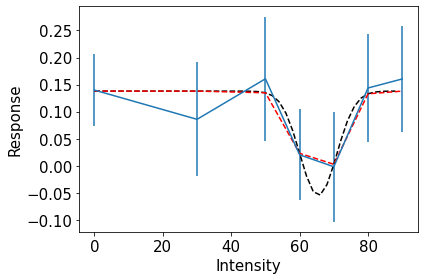

dataset 2 cell 102 params [0.2681096647481773, 51.46486408405715, 4.843924526943592] MI 0.32195154197588705 Interpolated error 0.012494810592071557


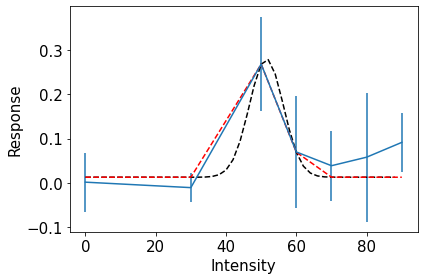

dataset 2 cell 136 params [0.37283726353289787, 63.584051005120266, 4.409519179137118] MI 0.03704709762791962 Interpolated error 0.05157905354373904


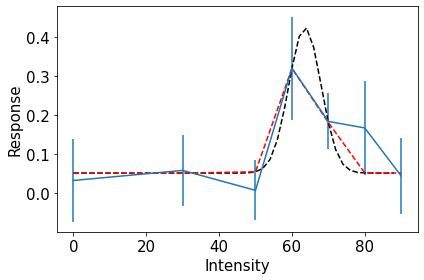

dataset 3 cell 178 params [0.2796853203849229, 27.42088121749172, 17.806313807518762] MI 0.30574814483975615 Interpolated error 0.014433271111816047


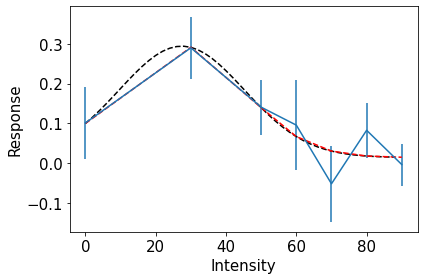

dataset 3 cell 172 params [0.23747000776854338, 41.55367588708866, 10.809775826555887] MI 0.022156027006528127 Interpolated error -0.0002075493217633427


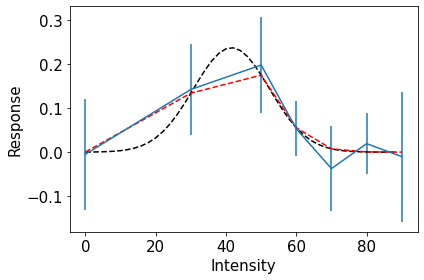

dataset 3 cell 163 params [0.5393400249181034, 40.97090787966248, 9.439373935917732] MI 0.20449039973301822 Interpolated error 0.07674547688353132


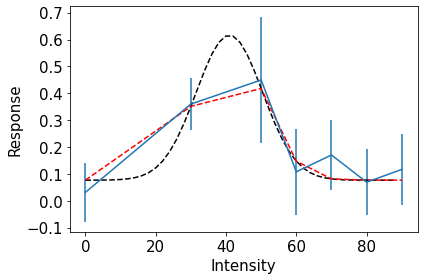

dataset 3 cell 160 params [-0.19589960811717685, 16.999319544008735, 12.872042896101483] MI 0.3088146041053306 Interpolated error 0.07714467422184018


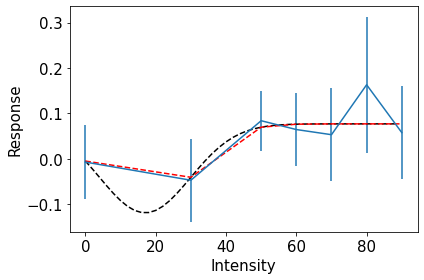

dataset 3 cell 152 params [0.30689614363366347, 48.686889450021106, 13.716046770432076] MI 0.01648085617268175 Interpolated error 0.012169860581810101


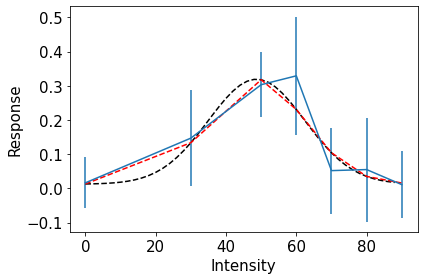

dataset 3 cell 142 params [-0.34311449943344496, 56.71292677746079, 26.884350860058657] MI 0.3181888917669095 Interpolated error 0.21708429834781445


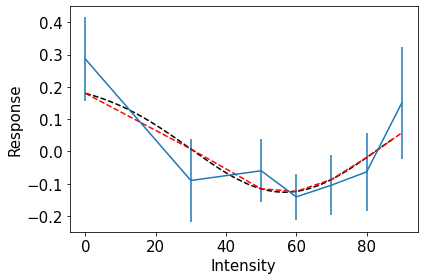

dataset 3 cell 128 params [-0.24297703139710042, 50.19475540241363, 5.3662828318223585] MI 0.19581910117089105 Interpolated error 0.04534117091045413


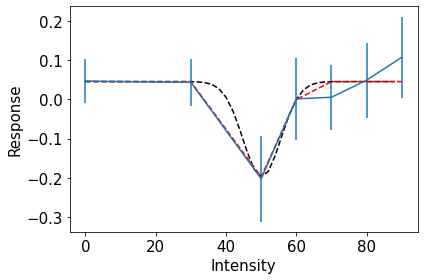

dataset 3 cell 118 params [-0.23124752363392542, 52.669736912882804, 7.0522301944568015] MI 0.410685834278236 Interpolated error 0.13756013688073657


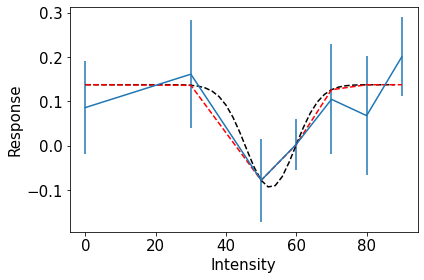

dataset 3 cell 115 params [-0.20389886517082775, 23.367988752415457, 23.27810596787638] MI 0.6717085180474595 Interpolated error 0.15441688686535757


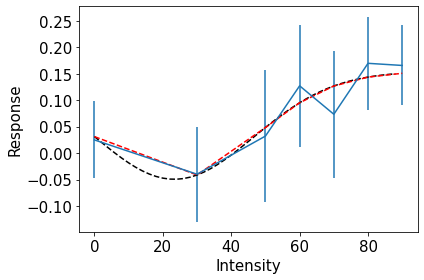

dataset 3 cell 111 params [-0.15775598220821652, 70.07805436432324, 17.355173525806155] MI 0.16221115373022874 Interpolated error 0.07834653688961311


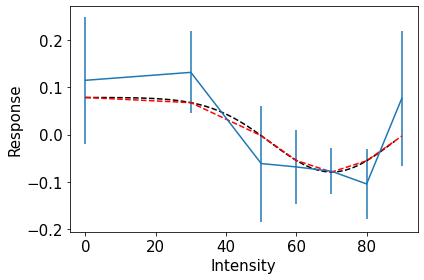

dataset 3 cell 103 params [-0.14608483581872997, 73.36085465161611, 6.68930573808645] MI 0.04641401639511125 Interpolated error 0.07112247950985255


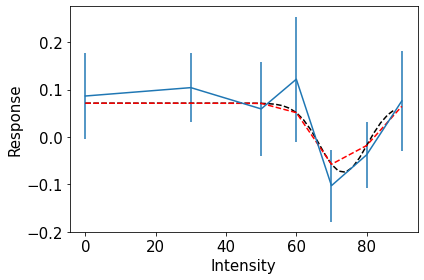

dataset 3 cell 91 params [0.1456036039071377, 36.73097402327407, 17.282521590313497] MI 0.24883756596649642 Interpolated error -0.0798297587655935


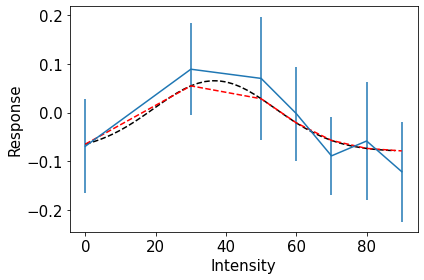

dataset 3 cell 90 params [0.2814168033326509, 35.784497714054936, 17.150461375608256] MI 0.0012283000178031386 Interpolated error -0.03868341392455684


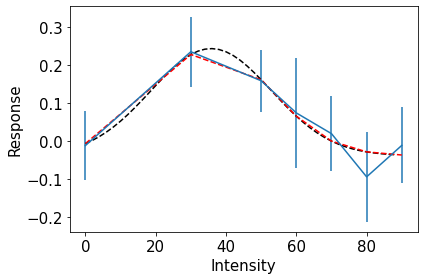

dataset 3 cell 86 params [0.35113600251588256, 79.62666182125213, 34.993589711655964] MI 0.4745272082169083 Interpolated error 0.03865409093095043


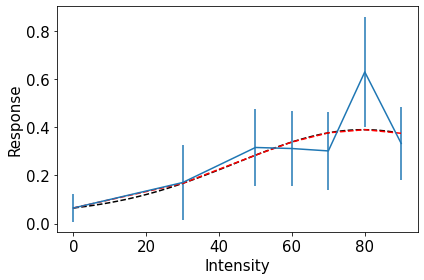

dataset 3 cell 66 params [0.6683569283362101, 73.8043271213573, 3.9457476402350764] MI 0.14729455008411058 Interpolated error 0.13314152108550958


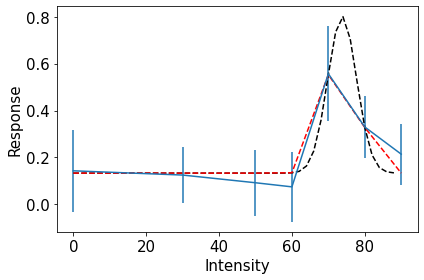

dataset 3 cell 55 params [-0.3854085880710338, 35.149483533418895, 11.386473959896213] MI 0.14742804467307324 Interpolated error 0.04256133676359712


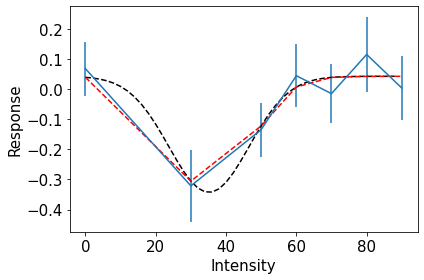

dataset 3 cell 52 params [0.26678873698071837, 41.735202565416124, 13.194266592352172] MI 0.19568863047019472 Interpolated error -0.20457311977028217


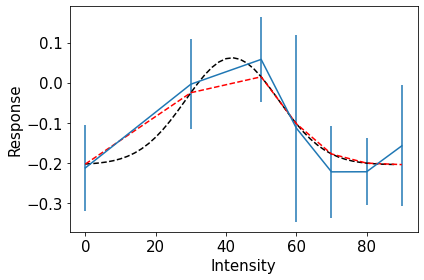

dataset 3 cell 48 params [-0.18711169166053354, 53.48061272106987, 5.532849051854394] MI 0.2716905413689003 Interpolated error -0.013515829566448081


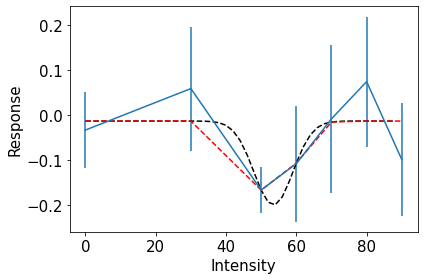

dataset 3 cell 45 params [0.20177945850998466, 37.01853066050672, 26.624806539896397] MI 0.38868323828602996 Interpolated error -0.014606976779091648


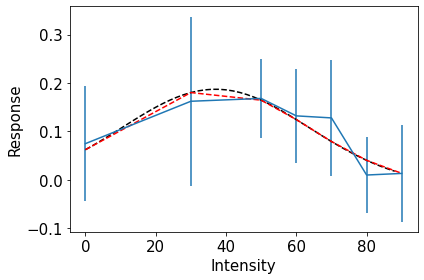

dataset 3 cell 30 params [-0.3397203657908974, 45.5924957476485, 8.399937057783127] MI 0.15531754486767607 Interpolated error 0.021538339304383956


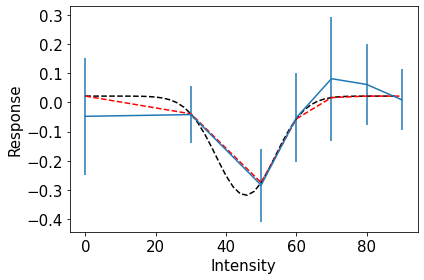

dataset 3 cell 5 params [0.47036137967124125, 43.233096726644746, 17.120203543020967] MI 0.4333297961028782 Interpolated error -0.04303707015671251


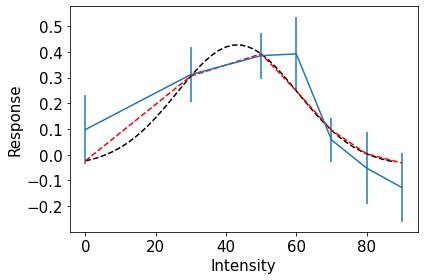

dataset 4 cell 260 params [0.14558763542469155, 65.66765168427823, 4.116396167169303] MI 0.19573413745444648 Interpolated error 0.05041374983963107


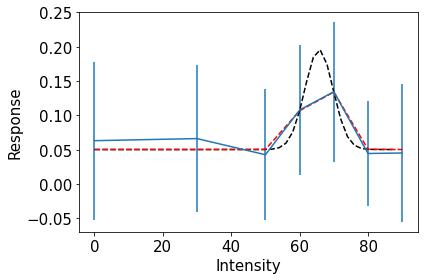

dataset 4 cell 254 params [-0.23590083509139878, 35.741020438858094, 16.12915075512753] MI 0.16600921036455935 Interpolated error 0.09555186071132915


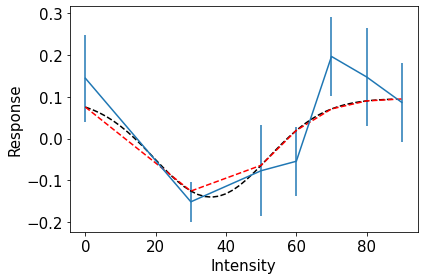

dataset 4 cell 250 params [-0.18994485712962705, 79.68837954697436, 9.249904247349507] MI 0.09852186682037971 Interpolated error -0.01074803121324566


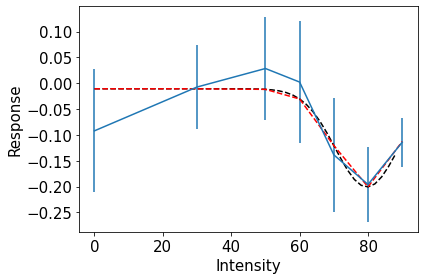

dataset 4 cell 241 params [-0.16840436039707427, 49.88812540047557, 30.11224970635902] MI 0.40486723879222575 Interpolated error 0.13006639933478006


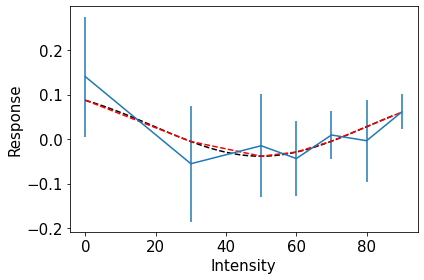

dataset 4 cell 239 params [0.11874192498309766, 46.37736026250645, 7.063102883248033] MI 0.31372750392280896 Interpolated error 0.03817372317603885


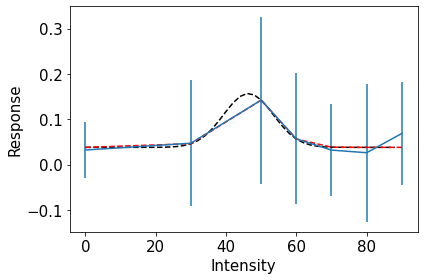

dataset 4 cell 238 params [0.15912897504106638, 48.148947947826954, 10.71972612818124] MI 0.22430223326595575 Interpolated error -0.09445125130054609


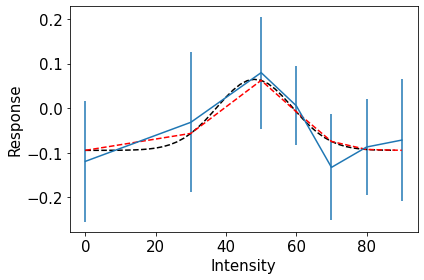

dataset 4 cell 237 params [0.16486849554938526, 49.93632391450322, 3.3000533061577313] MI 0.1608775800522532 Interpolated error -0.06026223632772787


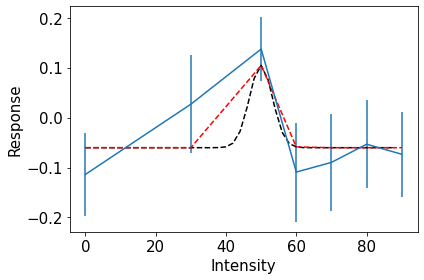

dataset 4 cell 222 params [0.2510254292514976, 77.69176512608303, 5.556999842423989] MI 0.1904183531201489 Interpolated error -0.02573962642989863


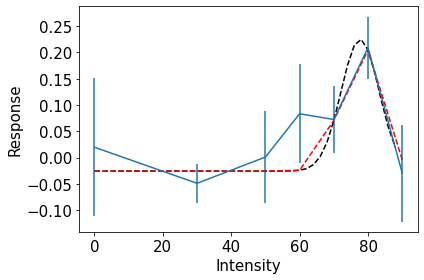

dataset 4 cell 213 params [0.34983412078997755, 74.28479222587985, 30.478669148792722] MI 0.5211991178831381 Interpolated error -0.08524901877718533


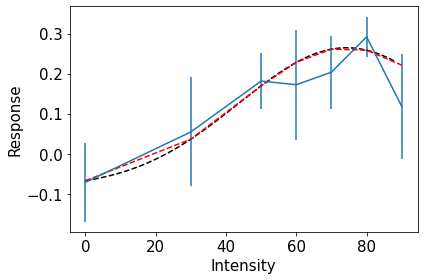

dataset 4 cell 212 params [-0.182294919238242, 45.610625189478675, 17.24662284698891] MI 0.38708708013031684 Interpolated error 0.09825519649461349


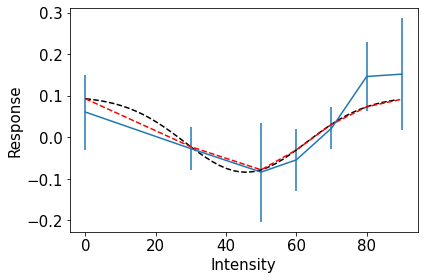

dataset 4 cell 211 params [0.1263408030862178, 53.45698202665149, 5.546062799987436] MI 0.1589325273714776 Interpolated error 0.00781390906409705


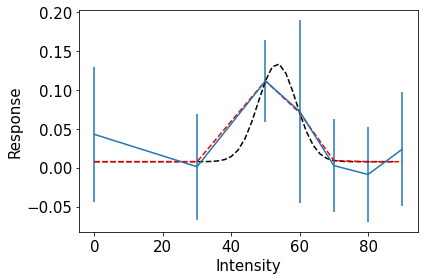

dataset 4 cell 208 params [0.15752098155415403, 51.328940995180304, 13.354836112591348] MI 0.442674917125357 Interpolated error -0.13219982819908213


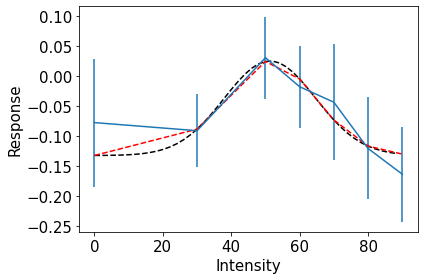

dataset 4 cell 199 params [0.1777148461519759, 74.98496335458407, 10.949859329920304] MI 0.49831431633415174 Interpolated error 0.023015790022241956


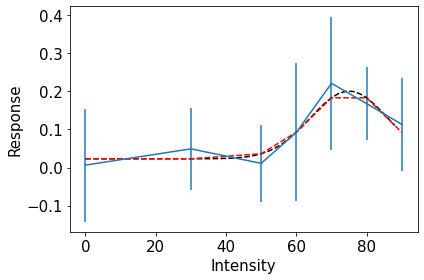

dataset 4 cell 193 params [0.23746199292112388, 29.811840379830688, 17.12755395059074] MI 0.33931569324849775 Interpolated error -0.06863351347106639


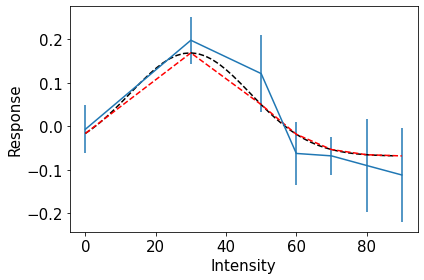

dataset 4 cell 191 params [-0.21013832009692018, 31.608014470462667, 6.581671819427148] MI 0.16986227344919302 Interpolated error 0.027349169194422623


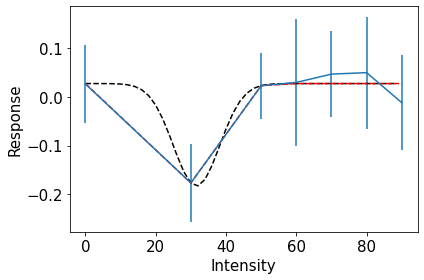

dataset 4 cell 188 params [0.1850929946664255, 50.54743679938154, 6.244270879580476] MI 0.07580966597300978 Interpolated error -0.08594315254187615


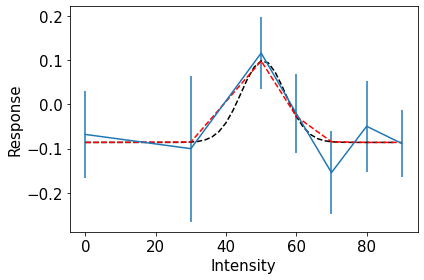

dataset 4 cell 167 params [-0.2601922242055829, 53.0719992293372, 8.509924330114282] MI 0.16794444431362351 Interpolated error 0.1340276455298057


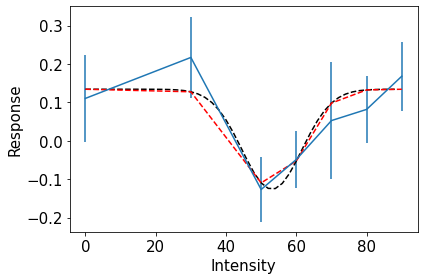

dataset 4 cell 139 params [-0.0929070589630957, 69.88649719698098, 3.3000542080826527] MI 0.24054669543764604 Interpolated error -0.007395714150437197


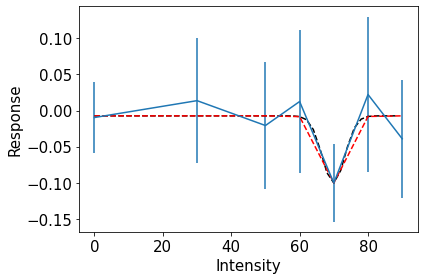

dataset 4 cell 132 params [0.159487927000497, 29.999998299779183, 3.300040538426802] MI 0.1529379826506552 Interpolated error -0.07456018202612164


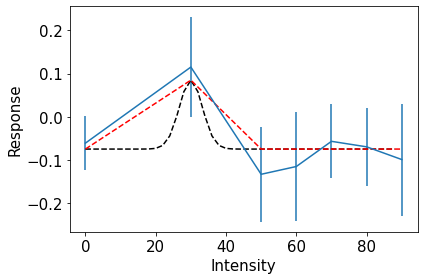

dataset 4 cell 120 params [0.24239229504907445, 52.24894175447531, 20.698194896696144] MI 0.18193787216849683 Interpolated error -0.12817105724023942


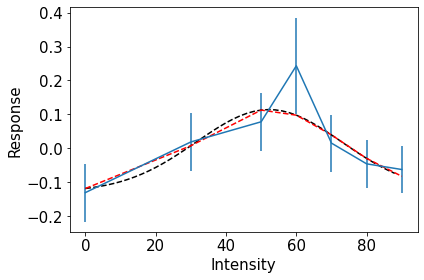

dataset 4 cell 119 params [-0.2784350654460897, 46.640185809051765, 15.664062835300399] MI 0.06520093291758194 Interpolated error 0.052194106580582635


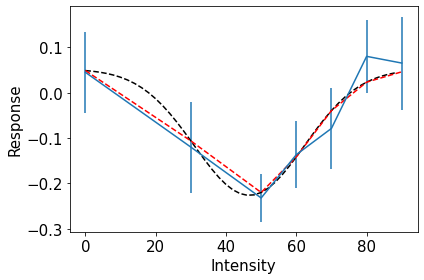

dataset 4 cell 115 params [-0.28830083981034726, 32.80177613329222, 8.016445432210144] MI 0.2529915058587131 Interpolated error 0.032132904406023025


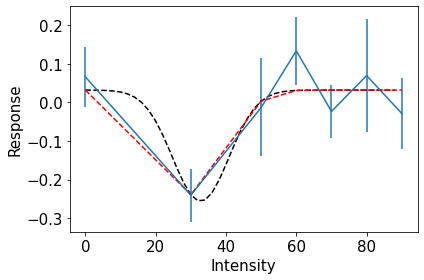

dataset 4 cell 108 params [0.32371649602530794, 49.9109183683391, 3.3000375829657447] MI 0.15321533502245713 Interpolated error -0.06947102591049606


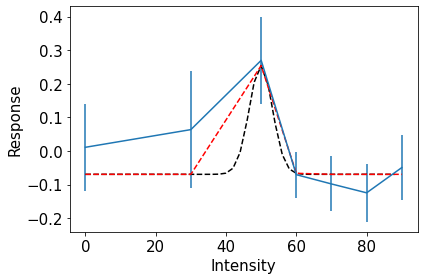

dataset 4 cell 96 params [0.17573422941460276, 61.235987236633754, 38.34561849072067] MI 0.5391534356073038 Interpolated error -0.3028709040969655


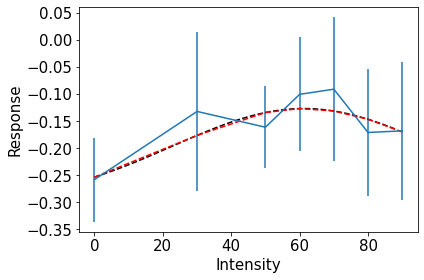

dataset 4 cell 95 params [0.08144998690448559, 73.39054210629918, 8.072112352943805] MI 0.04514312284540608 Interpolated error -0.035846411802522474


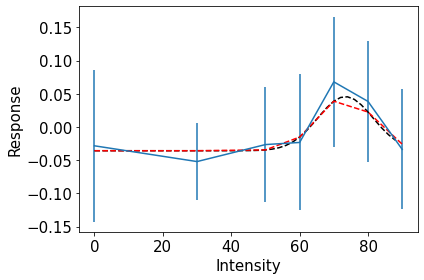

dataset 4 cell 94 params [0.3864099469165381, 74.03464813749365, 8.297128272573806] MI 0.1916064573884717 Interpolated error 0.002883157462611766


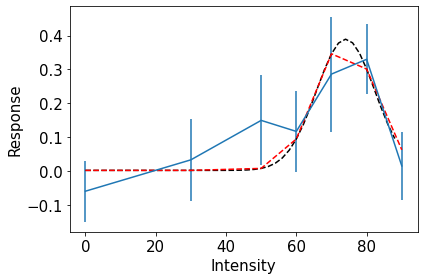

dataset 4 cell 91 params [-0.2390561723842912, 44.11871363956396, 16.488988805242048] MI 0.01090822449092502 Interpolated error 0.015406725539054106


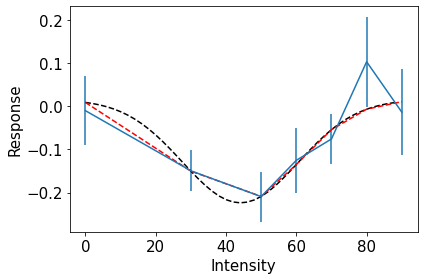

dataset 4 cell 90 params [-0.1908856354709371, 78.94387889931974, 12.287202658682084] MI 0.39881176747433966 Interpolated error 0.05066979521737383


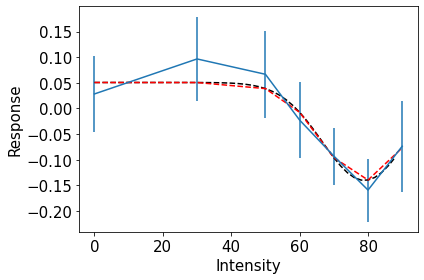

dataset 4 cell 65 params [0.2288634877947674, 37.44054274891548, 12.816552378202191] MI 0.41011930570734195 Interpolated error -0.11838127937724548


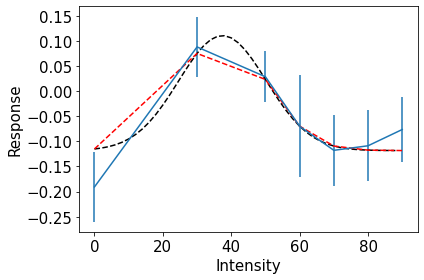

dataset 4 cell 58 params [0.21222780695239343, 50.009122236071114, 4.214083156664434] MI 0.021933247541538033 Interpolated error -0.05243227120678591


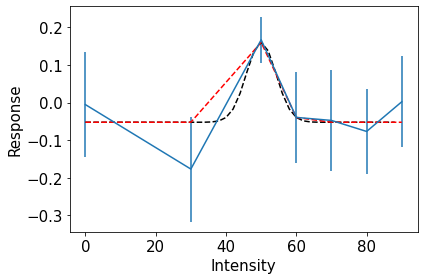

dataset 4 cell 27 params [0.10642370367373863, 60.247399956589724, 3.3000569250718446] MI 0.2077808499944759 Interpolated error 0.0391869455537571


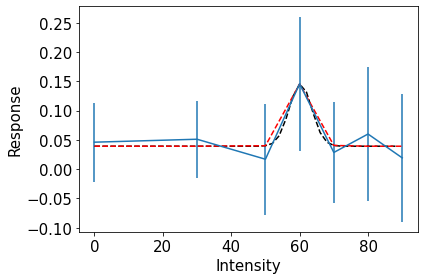

dataset 4 cell 11 params [-0.12848475092460324, 66.1839505054517, 7.341431216761287] MI 0.198163341208009 Interpolated error -0.01043853728277167


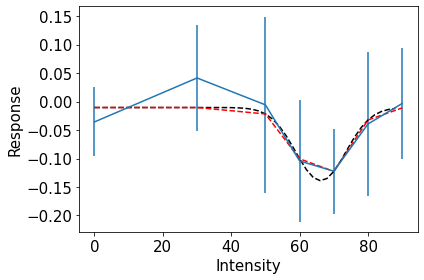

dataset 4 cell 4 params [-0.16688215695963854, 63.377884320327034, 11.198890646335139] MI 0.07497962505009091 Interpolated error 0.07868171359894495


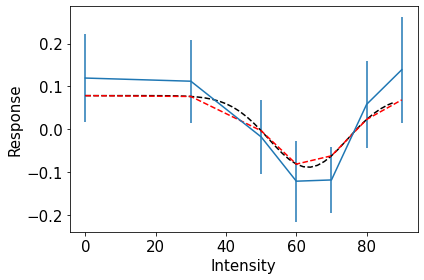

dataset 4 cell 2 params [-0.24611558157024777, 28.915405452314744, 4.130929902274883] MI 0.5552240487079577 Interpolated error 0.10994140594079246


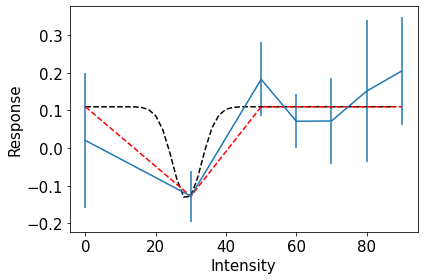

dataset 5 cell 240 params [0.16114004063188958, 74.45910163520671, 13.44207719804444] MI 0.6903040044820603 Interpolated error -0.014243352446916834


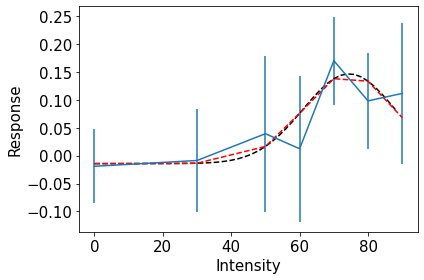

dataset 5 cell 234 params [-0.21986827016760174, 21.266639473987706, 13.426184338718205] MI 0.1841432855125666 Interpolated error 0.04828244502109029


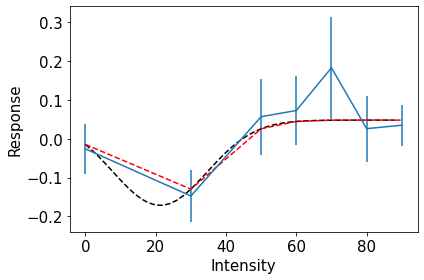

dataset 5 cell 226 params [-0.22336396510924286, 65.37421139280683, 21.045063470307575] MI 0.5110020087511008 Interpolated error 0.10018334443382497


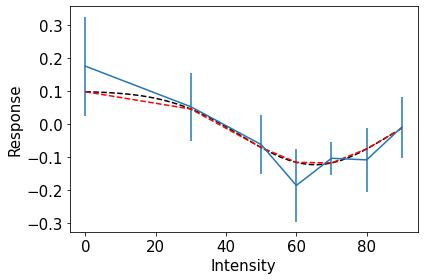

dataset 5 cell 225 params [0.26534981219726517, 32.02152214312457, 12.998823474142323] MI 0.08223577444935327 Interpolated error -0.1656778021671238


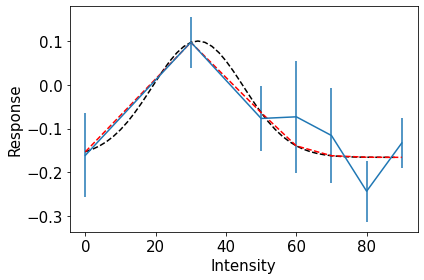

dataset 5 cell 211 params [0.23320689811792292, 59.629464783471285, 13.094994537280902] MI 0.008466104402647662 Interpolated error -0.17427342089772732


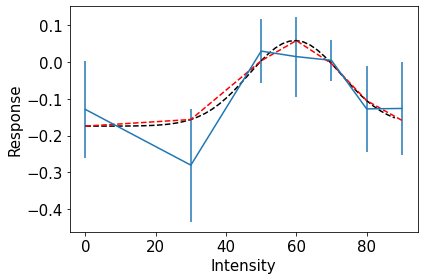

dataset 5 cell 185 params [-0.2884652816797465, 61.79635538052699, 7.8358790473569035] MI 0.07767903018499339 Interpolated error 0.0771765045294631


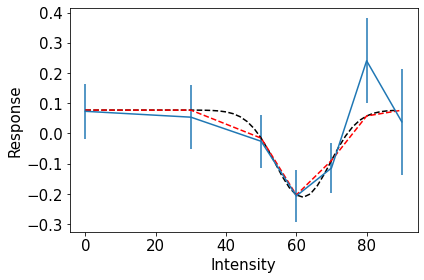

dataset 5 cell 180 params [-0.22965856962421805, 32.65745463992984, 3.9941120963300163] MI 0.5688716984269064 Interpolated error 0.03683016960099827


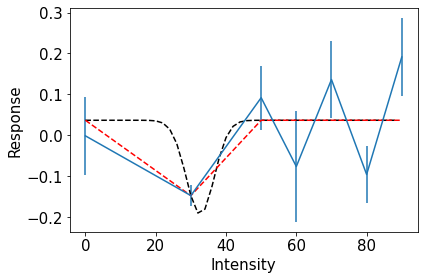

dataset 5 cell 177 params [-0.25122057772928946, 66.56558203605442, 15.292387135125137] MI 0.23549274290789976 Interpolated error -0.07548528616401301


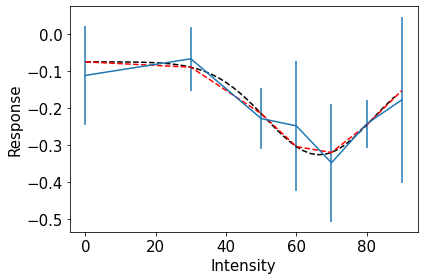

dataset 5 cell 163 params [-0.13908621366466745, 70.65270682083322, 10.835866161074117] MI 0.07776991021127384 Interpolated error 0.09828092030565659


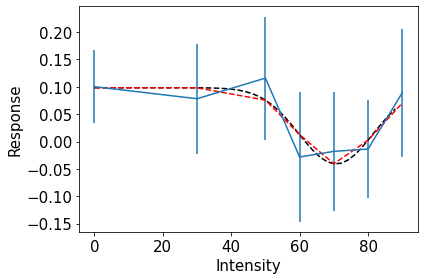

dataset 5 cell 160 params [0.168443896822593, 50.41807126126926, 12.800612506726388] MI 0.07568987958222054 Interpolated error -0.10441422318079903


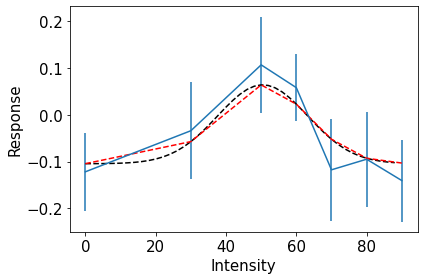

dataset 5 cell 149 params [-0.23636308228755246, 37.68066098305208, 18.38513871921482] MI 0.024240661841272243 Interpolated error -0.009555385959943416


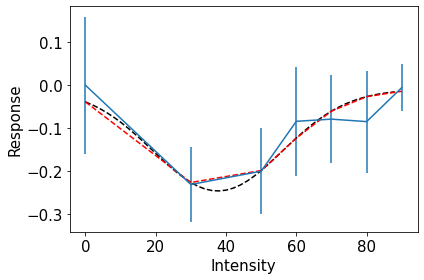

dataset 5 cell 146 params [-0.31884956938813763, 42.115085050001284, 7.473192391705162] MI 0.03475777249503965 Interpolated error -0.08101496853131425


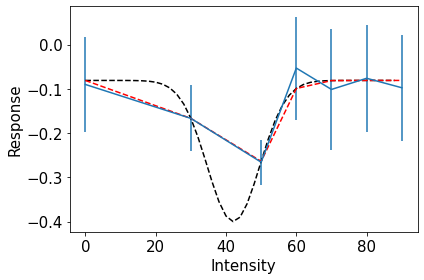

dataset 5 cell 122 params [0.19181053607927748, 47.29166635867582, 12.42687782868104] MI 0.26180058120024047 Interpolated error -0.2228525080831973


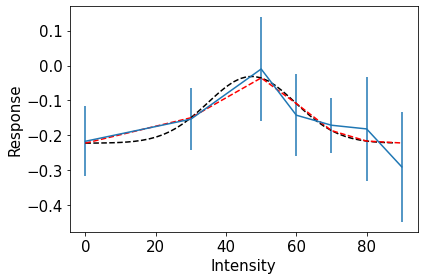

dataset 5 cell 97 params [0.14688211670928797, 68.30097536585015, 14.275214756092318] MI 0.025080944325176043 Interpolated error -0.09686269660414365


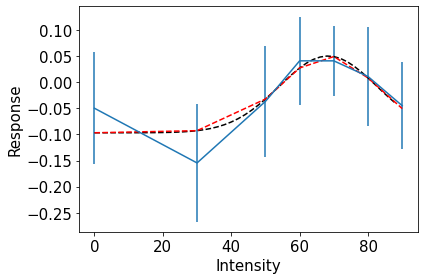

dataset 5 cell 96 params [-0.18088461015097307, 47.36380563432392, 3.628823429964148] MI 0.25631784285037484 Interpolated error 0.10803291571387669


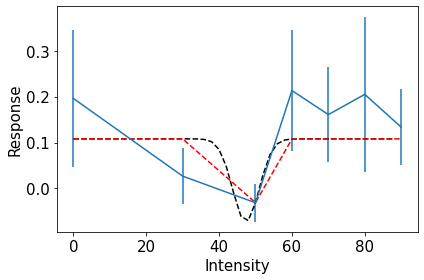

dataset 5 cell 88 params [0.21002657592697238, 48.92187653160789, 3.304918960312818] MI 0.40626931684272793 Interpolated error -0.008275194083485956


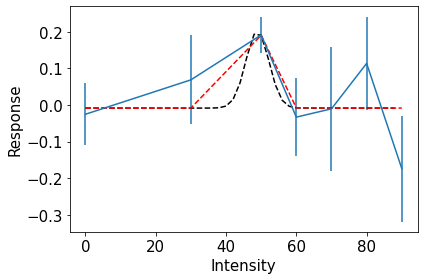

dataset 5 cell 75 params [-0.27450181111906896, 57.202412423684045, 18.86892023693281] MI 0.24934135043902317 Interpolated error 0.07102878641802396


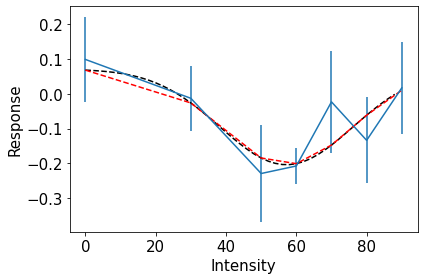

dataset 5 cell 69 params [-0.30530388116254287, 49.93629547237878, 3.3000614456853725] MI 0.1561714327979288 Interpolated error 0.10493932950074045


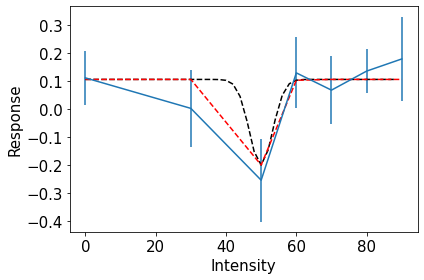

dataset 5 cell 50 params [0.24917933944987897, 61.459248536090655, 6.452946346557672] MI 0.12672388755481515 Interpolated error -0.01872667248113574


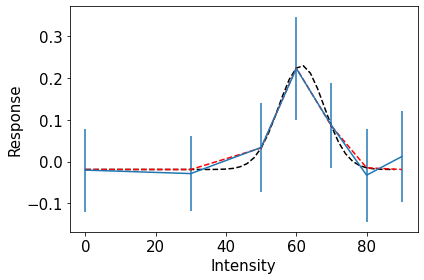

dataset 5 cell 49 params [0.3456686332412516, 59.10972552412627, 3.300058258538106] MI 0.24312594048879854 Interpolated error -0.19969935006406792


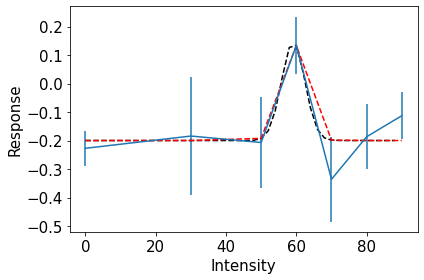

dataset 5 cell 42 params [0.15545749341298148, 69.73679493875544, 5.838820664474115] MI 0.0181237790793406 Interpolated error -0.09718507248128298


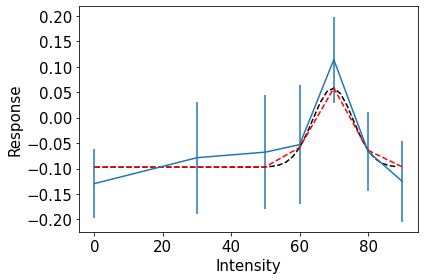

dataset 5 cell 38 params [-0.8641613610596163, 66.85415231985817, 4.077700464579226] MI 0.2631288397205407 Interpolated error -0.1408319298429829


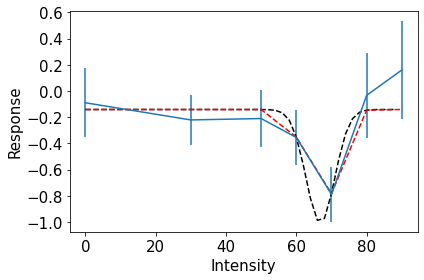

dataset 5 cell 21 params [-0.3305411074257961, 20.5820112825446, 16.25234633877837] MI 0.527282514648037 Interpolated error -0.0505076951920579


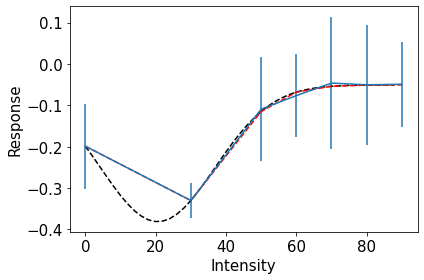

dataset 5 cell 20 params [-0.12779279229305945, 29.999990687560196, 3.3000238462090183] MI 0.474434814907432 Interpolated error 0.07514977200432676


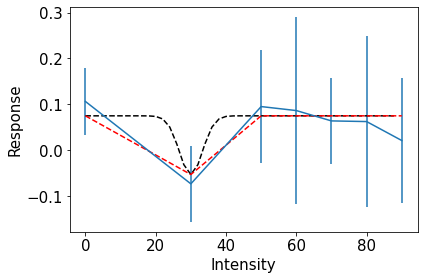

dataset 5 cell 14 params [0.3507250598212365, 70.36883370584137, 3.3000641789534315] MI 0.10171045425927147 Interpolated error 0.012671215940484473


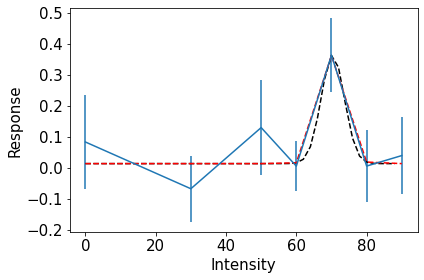

dataset 5 cell 8 params [-0.18736728339333011, 26.121508437937923, 23.659842952344995] MI 0.16757620289150912 Interpolated error -0.07241093574735864


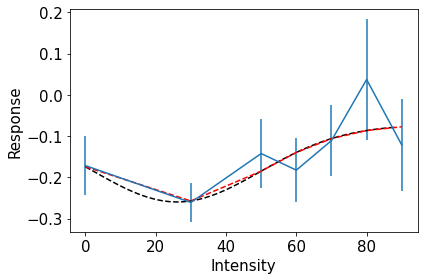

dataset 5 cell 6 params [-0.2019341547026482, 64.74284196359963, 12.666322963130984] MI 0.07735750877322471 Interpolated error -0.08326223709974691


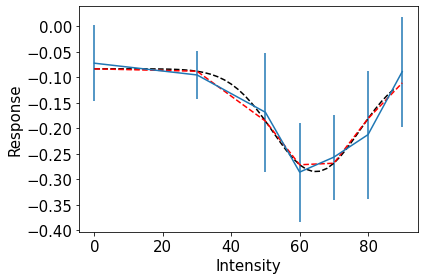

dataset 5 cell 1 params [0.205712604108591, 52.4439951701126, 12.593675820869786] MI 0.6803514036014551 Interpolated error 0.041978195159927845


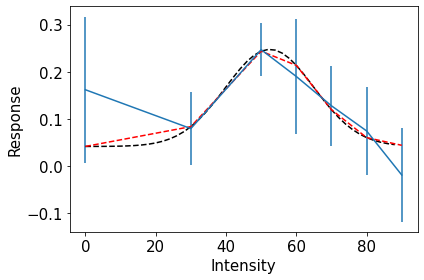

dataset 6 cell 324 params [0.2895700881059238, 27.224963966508795, 16.246409380738722] MI 0.04431618354718598 Interpolated error -0.14569758930632104


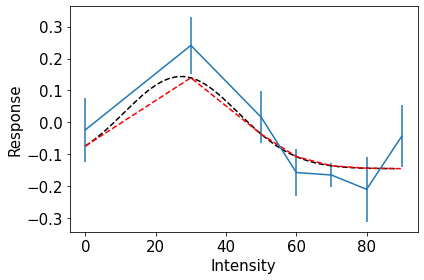

dataset 6 cell 312 params [-0.4076112085950682, 25.786431208506674, 12.625520826381562] MI 0.13891386830026872 Interpolated error 0.040118034874469126


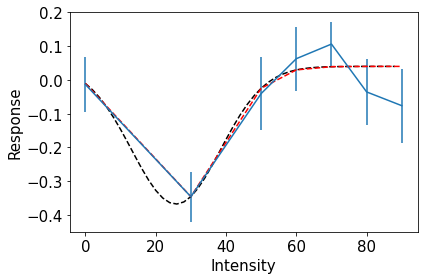

dataset 6 cell 308 params [0.1867253216891891, 70.3279269278202, 5.695576610431046] MI 0.2253143665762174 Interpolated error 0.030377007418587322


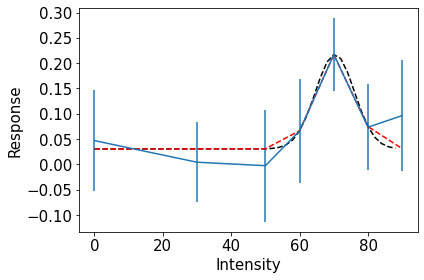

dataset 6 cell 307 params [-0.18018160640628467, 62.70491354314924, 6.141260520842284] MI 0.17330098892985765 Interpolated error 0.06887748319010834


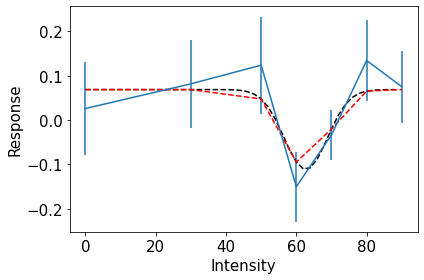

dataset 6 cell 303 params [-0.1977921640413478, 57.639185610241796, 4.0910689026691225] MI 0.14188265211307544 Interpolated error 0.0887219958693204


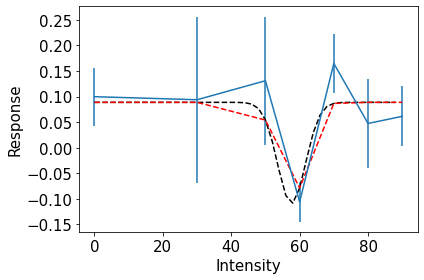

dataset 6 cell 302 params [-0.25172729867897775, 49.16034544151466, 3.30004172379563] MI 0.030148580471212244 Interpolated error 0.007295323391768967


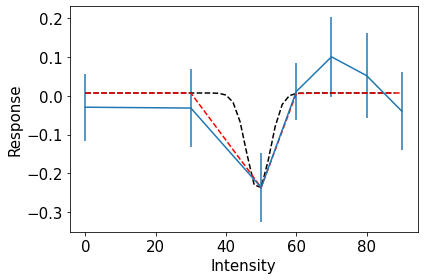

dataset 6 cell 295 params [0.24041908041559837, 67.41941778086051, 10.706214125563246] MI 0.6022445624543322 Interpolated error -0.18131430791270495


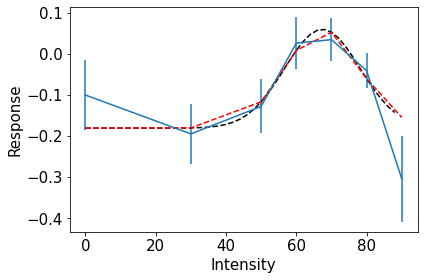

dataset 6 cell 294 params [0.30640831590385487, 61.18804881299635, 42.642170479169764] MI 0.5599675756969439 Interpolated error -0.37099676703105106


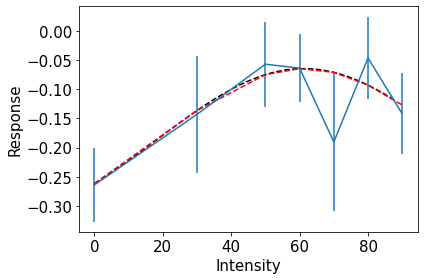

dataset 6 cell 289 params [0.24831227266990671, 52.55739396379077, 9.79091068901543] MI 0.5391388164137488 Interpolated error 0.014937928216153388


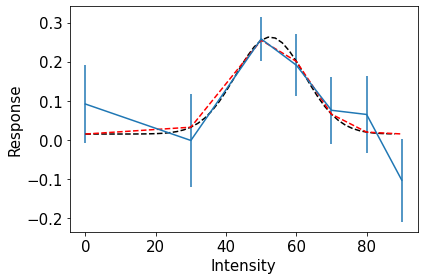

dataset 6 cell 286 params [0.22014910375898272, 71.97056764048244, 13.269664543794166] MI 0.3095478150786314 Interpolated error 0.22801967501049183


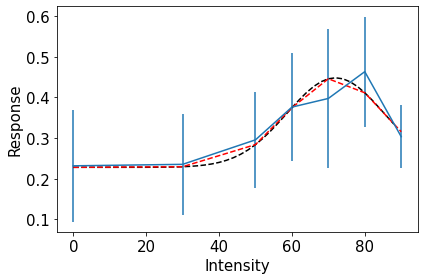

dataset 6 cell 279 params [-0.3431122437532805, 22.827445626487325, 17.421622337258032] MI 0.34624406384705697 Interpolated error 0.0412654083083217


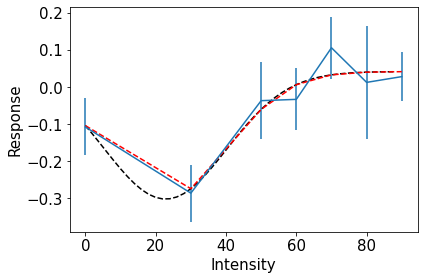

dataset 6 cell 271 params [0.2948741672313743, 49.2605624849472, 27.93789746968765] MI 0.15560266049479504 Interpolated error -0.28970812562915443


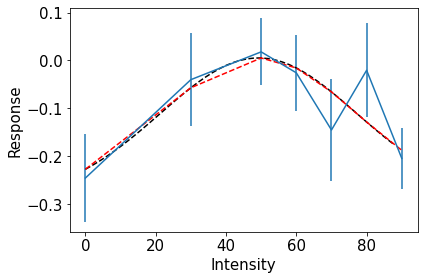

dataset 6 cell 267 params [0.34497328254517123, 54.65826550020771, 22.842045505357316] MI 0.5067313246779023 Interpolated error -0.23019350344687917


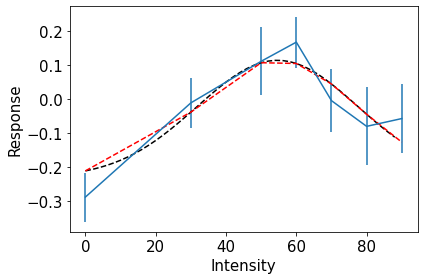

dataset 6 cell 258 params [0.3008626981652021, 73.181508280481, 3.440642038525997] MI 0.27976039480126197 Interpolated error 0.09137710197718309


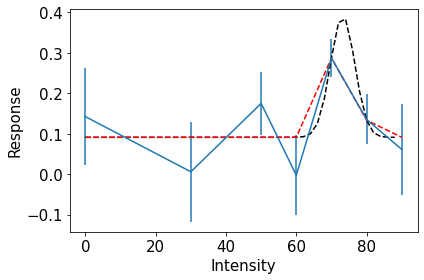

dataset 6 cell 257 params [-0.2464459956860708, 62.56727871043934, 11.4909238753672] MI 0.26678720809323203 Interpolated error 0.09111700483653407


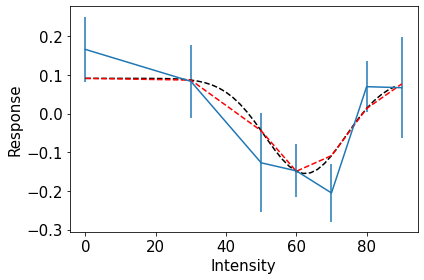

dataset 6 cell 253 params [0.2371222966970304, 51.71397260992261, 5.063483798780007] MI 0.04931718532667542 Interpolated error -0.02350423888878605


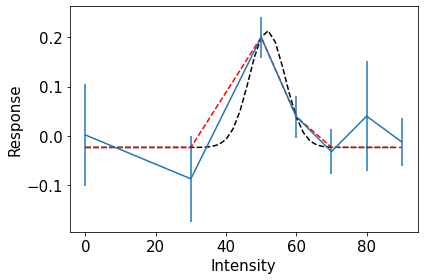

dataset 6 cell 232 params [-0.22196635095530573, 21.079561031150202, 24.974154893944043] MI 0.4257520533932214 Interpolated error 0.12026503594608273


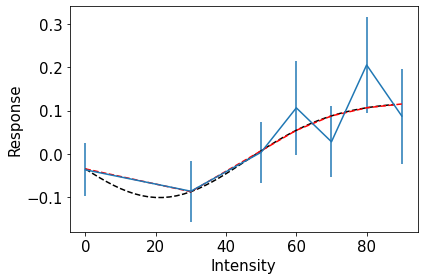

dataset 6 cell 186 params [0.1345357329220191, 53.184992473359344, 9.681912429067202] MI 0.21642891754833424 Interpolated error 0.10458703673479006


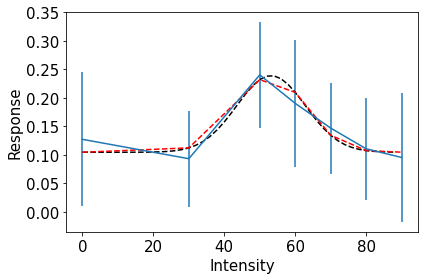

dataset 6 cell 184 params [0.3897483382895845, 61.966184267201, 13.838515349880268] MI 0.24949077995830016 Interpolated error 0.035161511544088454


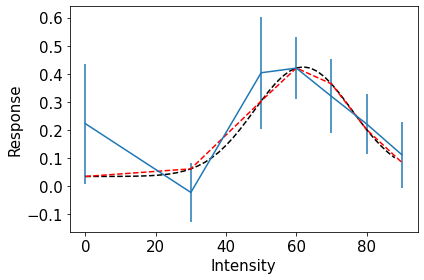

dataset 6 cell 169 params [-0.25356662697064847, 60.127884457122306, 3.3000571880513427] MI 0.09437679322064518 Interpolated error 0.07608627589411643


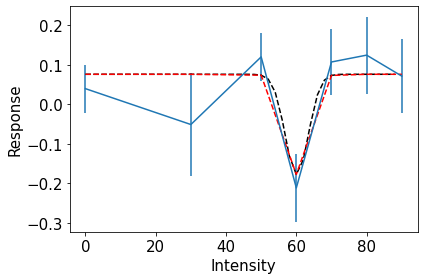

dataset 6 cell 168 params [-0.19099607611695515, 32.858438599058616, 29.663848994325992] MI 0.1450317692483025 Interpolated error 0.011042116619688788


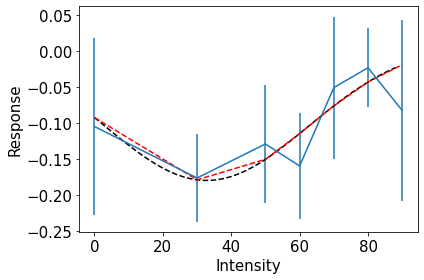

dataset 6 cell 163 params [0.1723423338344036, 49.25269308525715, 3.303665654821468] MI 0.13614983842592557 Interpolated error 0.12319807063253643


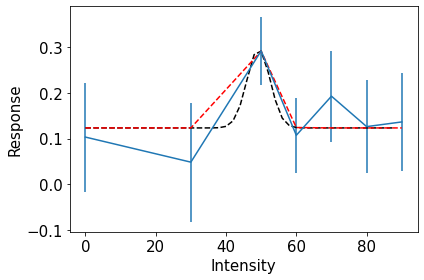

dataset 6 cell 160 params [-0.1095633570739156, 79.14392660900535, 11.364256460424905] MI 0.6750911759867703 Interpolated error -0.057900086293038264


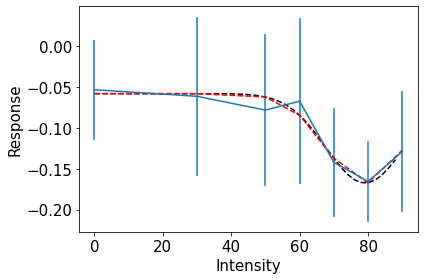

dataset 6 cell 155 params [0.11873933452879254, 25.034084703618184, 16.15549388061098] MI 0.3829519799984356 Interpolated error -0.08637817773497075


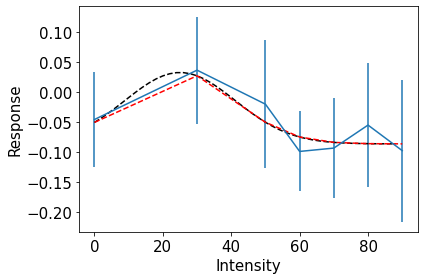

dataset 6 cell 146 params [0.2234634832643593, 49.57777338690282, 3.3000560720974517] MI 0.03519194858040211 Interpolated error -0.20860716814278737


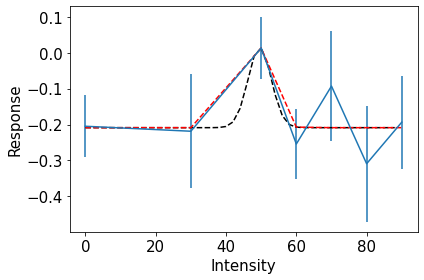

dataset 6 cell 136 params [0.2641597267627738, 48.705126294539696, 15.504114406906858] MI 0.30157989886137593 Interpolated error -0.19600353228252074


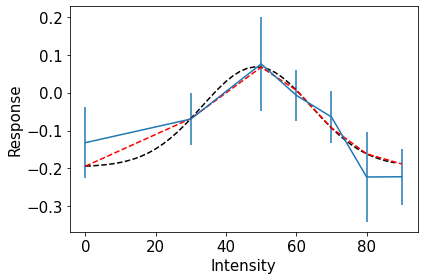

dataset 6 cell 110 params [-0.285669751278994, 66.39055105558997, 4.902728761979957] MI 0.1799478305125087 Interpolated error -0.016085884460578664


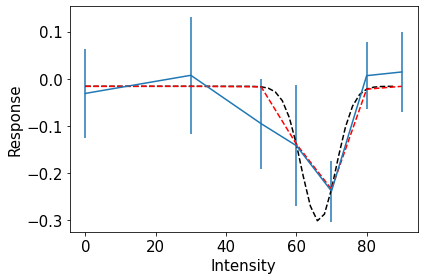

dataset 6 cell 107 params [0.16019928799869385, 62.715261738790325, 4.558571475423668] MI 0.14029557260767142 Interpolated error -0.06239807514184021


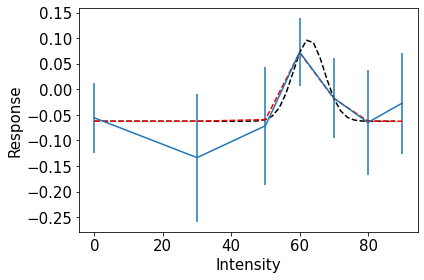

dataset 6 cell 101 params [-0.09262522249379757, 58.99475097972473, 3.3000004987322322] MI 0.03915269648371633 Interpolated error -0.038897312624847774


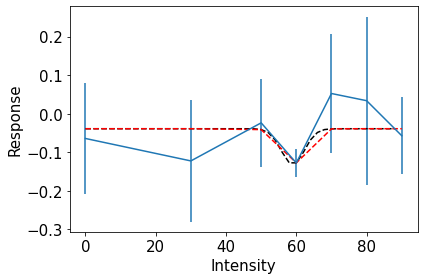

dataset 6 cell 96 params [0.16028495365966658, 64.42043550735931, 9.582947608206815] MI 0.1119558211480623 Interpolated error -0.10288652188167528


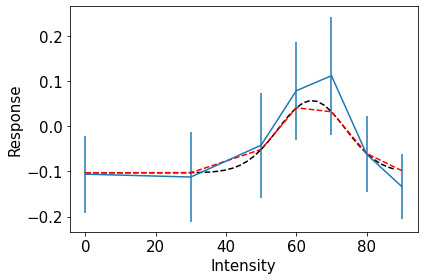

dataset 6 cell 91 params [-0.2552703407313103, 48.772564301990315, 3.300059743521529] MI 0.190697302372384 Interpolated error 0.02526393007293011


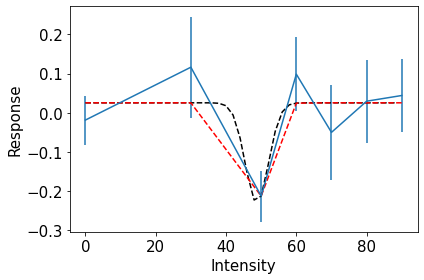

dataset 6 cell 86 params [0.4974874216612927, 56.42324359053213, 4.116187285098574] MI 0.012260298495954303 Interpolated error -0.4328880829552487


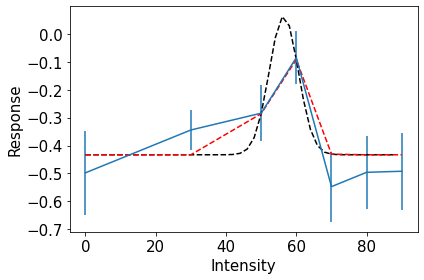

dataset 6 cell 80 params [0.4311188620740442, 59.97204629636278, 3.300064180417664] MI 0.19496723751330297 Interpolated error -0.2138607862787522


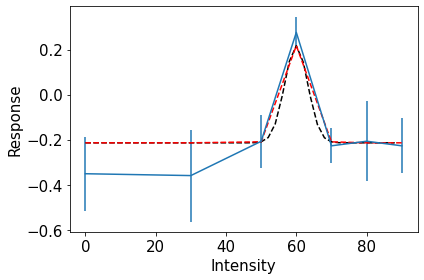

dataset 6 cell 68 params [0.192897894134459, 59.20291947679883, 4.976679187422702] MI 0.4254677494037288 Interpolated error -0.10704494966467282


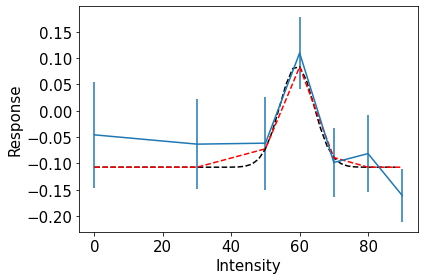

dataset 6 cell 52 params [-0.1668482819215477, 68.57733843378998, 19.566291080420037] MI 0.3098420361071286 Interpolated error 0.04259782814839481


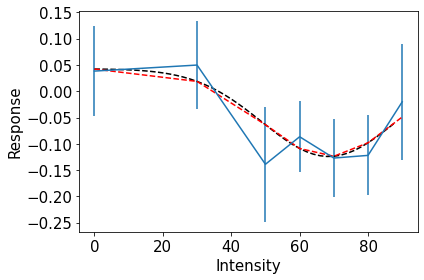

dataset 6 cell 47 params [0.2508116868231848, 59.21802135996049, 6.892268402058944] MI 0.14916375798561876 Interpolated error -0.1704242356055714


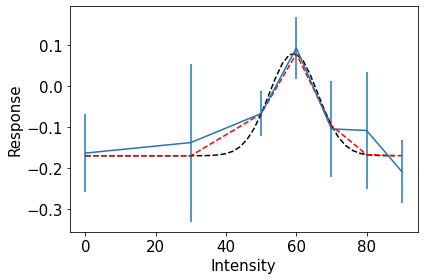

dataset 6 cell 36 params [-0.5115922948942678, 52.15745552563876, 46.18038706012381] MI 0.30630776723185743 Interpolated error 0.08249059925834974


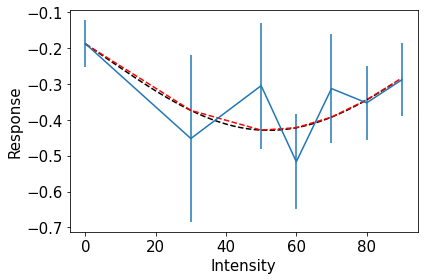

dataset 6 cell 28 params [0.2134607119854744, 45.23590632498232, 14.508277952713872] MI 0.4676683061124665 Interpolated error -0.1347417858698538


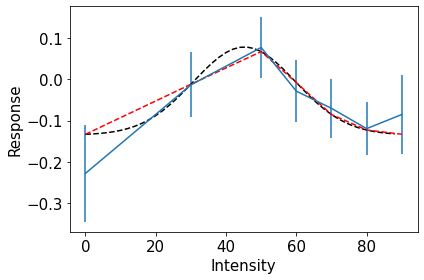

dataset 6 cell 27 params [0.1581140140916955, 49.59915000086715, 22.97454929009422] MI 0.08102849392028003 Interpolated error -0.1443306667965121


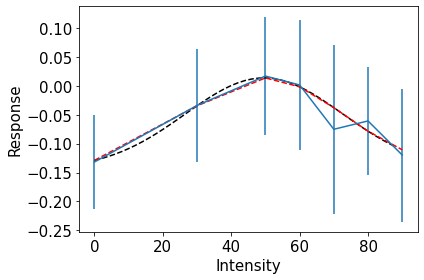

dataset 6 cell 21 params [0.184513439719268, 64.80824473637874, 13.967051710925784] MI 0.06622847513562755 Interpolated error 0.034156538880496606


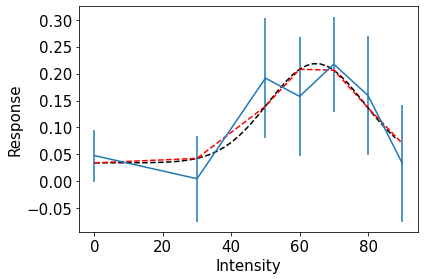

dataset 7 cell 176 params [-0.28416496953397963, 52.52183386831469, 6.196441870774518] MI 0.4526139420387615 Interpolated error 0.02961294315146511


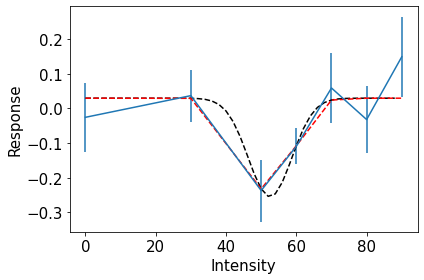

dataset 7 cell 174 params [-0.1622095738145315, 60.377901249024994, 5.710695217235493] MI 0.15723894719448275 Interpolated error 0.04714550862413114


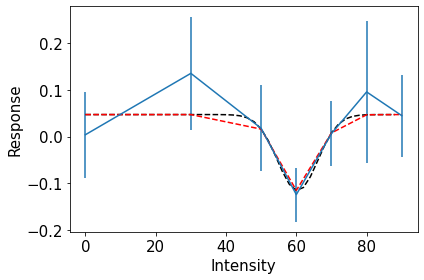

dataset 7 cell 171 params [-0.1332072707955771, 57.7790080604041, 15.256909192154243] MI 0.14844757158187147 Interpolated error 0.001304770379693989


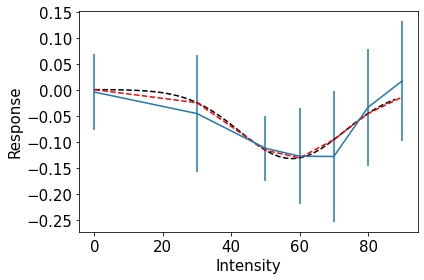

dataset 7 cell 162 params [-0.29344818956762586, 32.672607961690005, 10.428719664859106] MI 0.4712556305394198 Interpolated error 0.1818704299793077


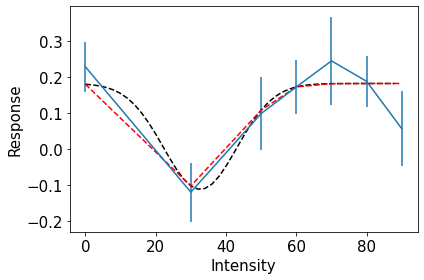

dataset 7 cell 157 params [-0.2042643713023867, 57.422170155077836, 5.167801597202362] MI 0.06807161994082277 Interpolated error 0.12928693638012642


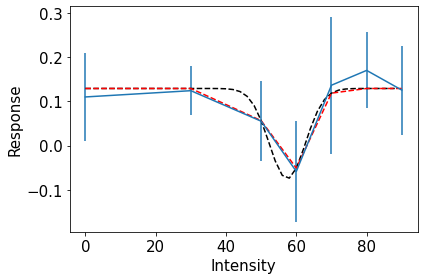

dataset 7 cell 154 params [-0.14843262946482808, 55.49964973816755, 10.129149466817433] MI 0.13867680481258188 Interpolated error 0.04770345802821898


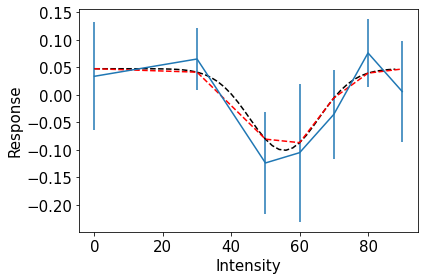

dataset 7 cell 142 params [-0.2564170328525151, 59.14532361970309, 5.31396922334232] MI 0.41231320953298434 Interpolated error 0.06704469218163026


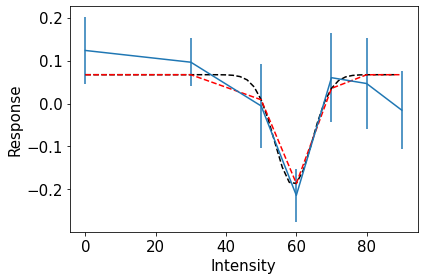

dataset 7 cell 124 params [-0.2015484759865878, 69.98552005204893, 4.344310349558169] MI 0.05688047191360784 Interpolated error 0.06877060267218356


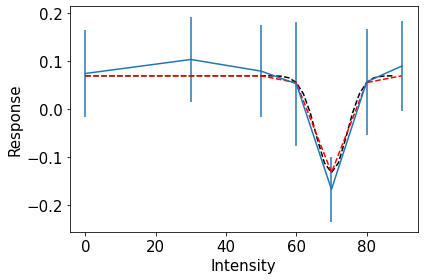

dataset 7 cell 123 params [-0.23647391651949262, 46.89577287601828, 23.979138282831023] MI 0.18581824319886833 Interpolated error 0.1897225893620107


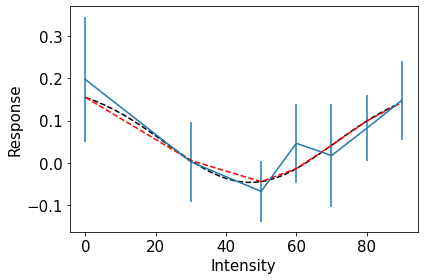

dataset 7 cell 110 params [0.21513551917050805, 49.995586317541324, 3.3000486788507786] MI 0.061543950332417705 Interpolated error -0.09295672453597617


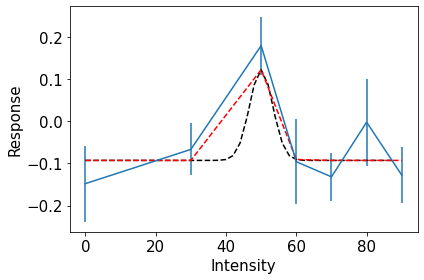

dataset 7 cell 109 params [-0.10384647387394877, 59.86571296341253, 3.300057020022895] MI 0.27414566017577296 Interpolated error 0.01965470680189335


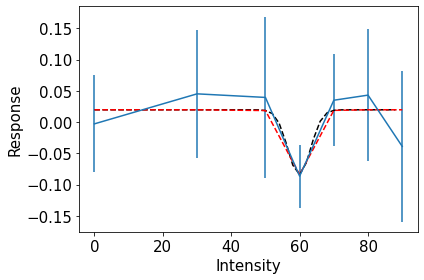

dataset 7 cell 107 params [-0.3543202535867456, 27.223489109164817, 3.400396802588874] MI 0.13893660403849345 Interpolated error -0.056389094099292374


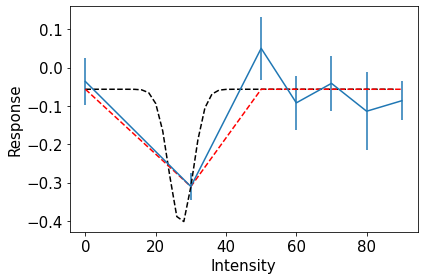

dataset 7 cell 105 params [0.22226391775176238, 53.64959952081894, 13.88099897269137] MI 0.31391089429570407 Interpolated error -0.025851755927916144


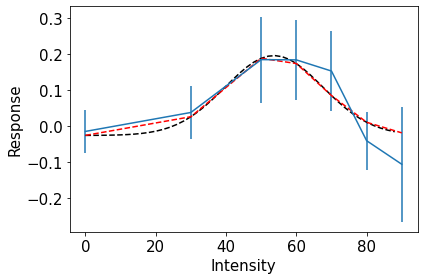

dataset 7 cell 81 params [-0.16373290694063472, 51.90072178681591, 5.593645277337393] MI 0.13697904560053842 Interpolated error 0.01099693776965866


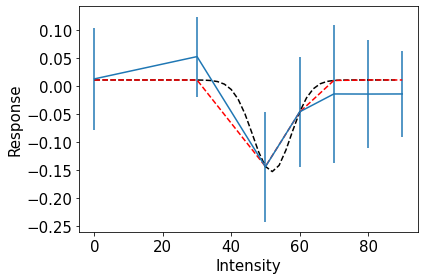

dataset 7 cell 80 params [-0.362405203060873, 25.37158355119054, 15.983466644035042] MI 0.40357334672709716 Interpolated error 0.007219226000209892


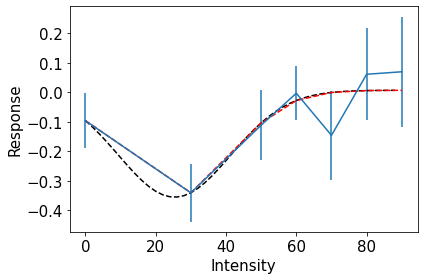

dataset 7 cell 57 params [0.18547670867447974, 52.261007066775846, 23.225546371852424] MI 0.24113642752589934 Interpolated error -0.1341446927868687


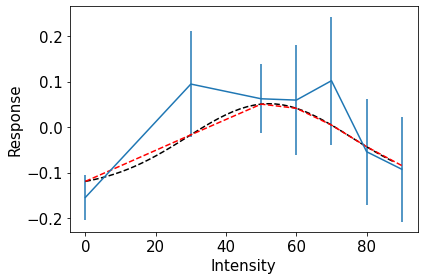

dataset 7 cell 56 params [-0.2966084295714322, 49.951944204142784, 3.300061466465072] MI 0.5552210446483208 Interpolated error 0.07893186064179734


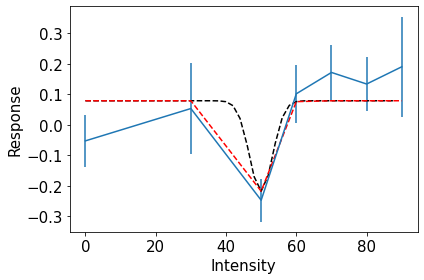

dataset 7 cell 53 params [-0.23227217176238504, 29.682670495040494, 3.6344893869240003] MI 0.2389840518551037 Interpolated error 0.01670766432310968


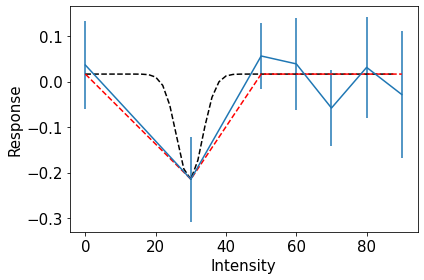

dataset 7 cell 24 params [0.19479127528120696, 76.62723952579667, 11.637962319706766] MI 0.13830818174008067 Interpolated error -0.13895159175675834


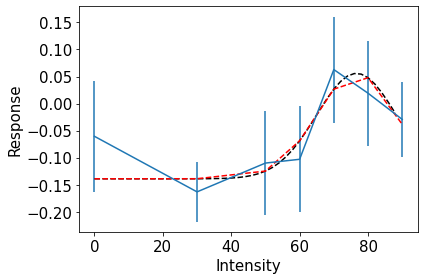

dataset 7 cell 20 params [0.13089184791530872, 53.487971670295146, 14.494648760797435] MI 0.3374057469684928 Interpolated error -0.03290583503836099


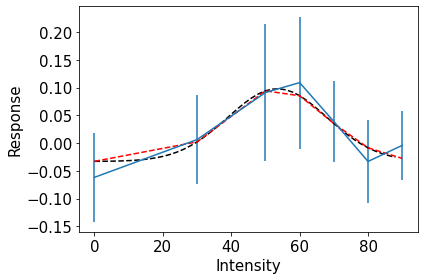

dataset 7 cell 1 params [0.17479310576673904, 72.40414057092283, 5.138136353222423] MI 0.4200022771616542 Interpolated error -0.009641158446864445


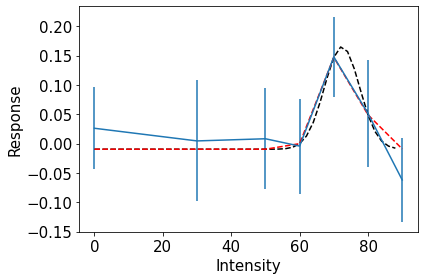

dataset 8 cell 160 params [0.10813600528059678, 62.978111378542444, 8.040070933033062] MI 0.339157143872572 Interpolated error -0.0292848549413695


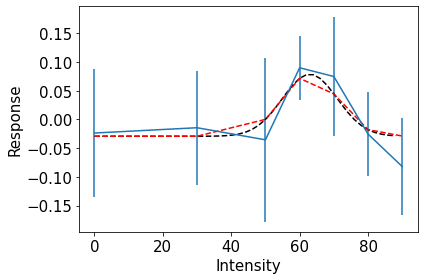

dataset 8 cell 158 params [-0.14254935805701957, 43.9998862378217, 14.106186067496834] MI 0.15839140595012158 Interpolated error 0.031728471446113286


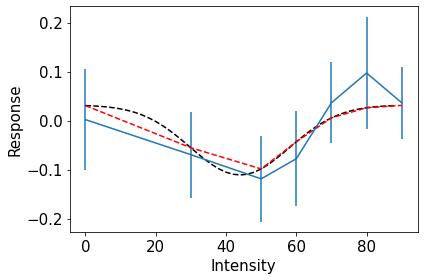

dataset 8 cell 152 params [-0.2127811766850473, 74.6725956464701, 7.697319822212256] MI 0.03361128326563714 Interpolated error 0.05301835170991368


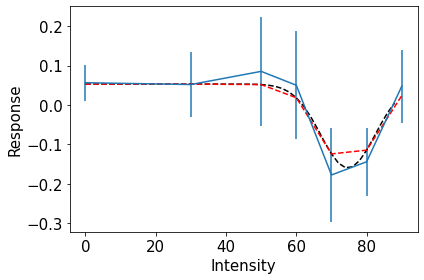

dataset 8 cell 147 params [-0.1957639033756083, 49.871090892437095, 3.3000586898171678] MI 0.6875424852828634 Interpolated error 0.03663739245318196


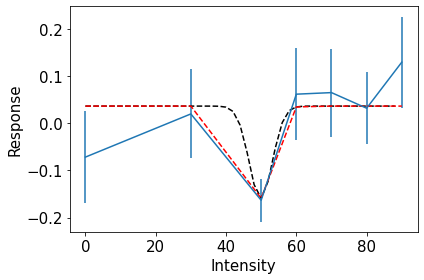

dataset 8 cell 126 params [-0.2729894129431529, 52.291676340490696, 7.141344260972133] MI 0.160406322821805 Interpolated error 0.04707102595859105


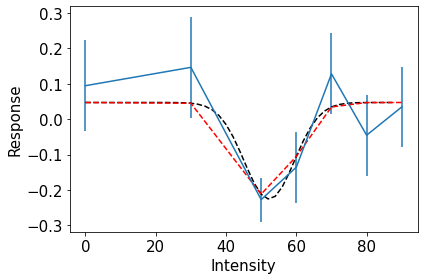

dataset 8 cell 124 params [-0.281159729601013, 47.82871710375536, 3.300032507466515] MI 0.4711764645920813 Interpolated error -0.010189893912924864


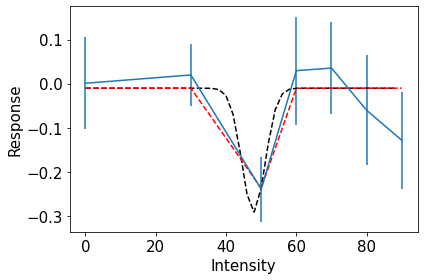

dataset 8 cell 123 params [-0.1766530605642792, 29.999993853588865, 3.30008204171445] MI 0.48780589922497875 Interpolated error 0.03489939781109916


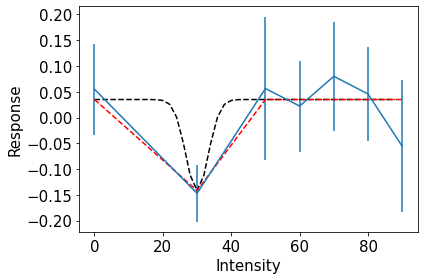

dataset 8 cell 94 params [-0.3088302824306401, 72.41072601397711, 12.990608119850739] MI 0.5152489295941886 Interpolated error 0.005249717132938825


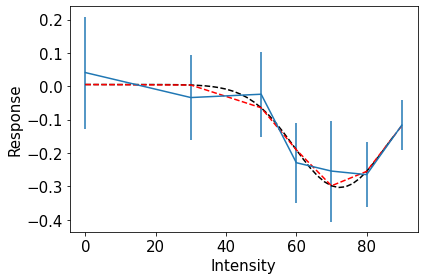

dataset 8 cell 93 params [-0.16179073371654024, 70.9311201390645, 8.008297264484293] MI 0.24005948029796878 Interpolated error -0.0036742401122611752


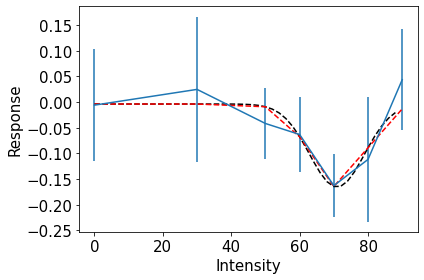

dataset 8 cell 88 params [-0.27132381511719744, 23.757381463997785, 13.08220928490261] MI 0.06751778224722127 Interpolated error -0.02493982173286244


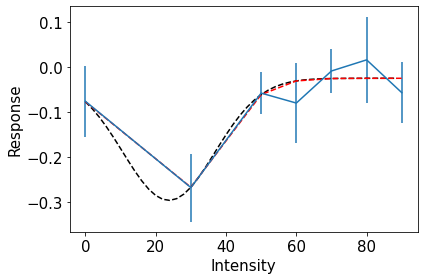

dataset 8 cell 76 params [-0.28582654322006307, 46.867443944311404, 30.24202037161463] MI 0.2807799094836448 Interpolated error 0.07039600564585806


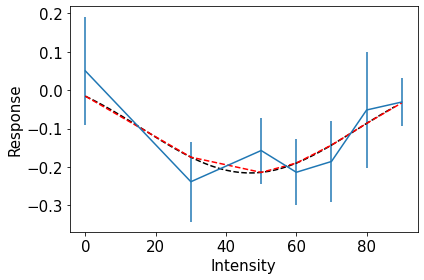

dataset 8 cell 52 params [0.31130850450071146, 62.92729420438823, 18.903250024876066] MI 0.3928291340901326 Interpolated error -0.2771980302608279


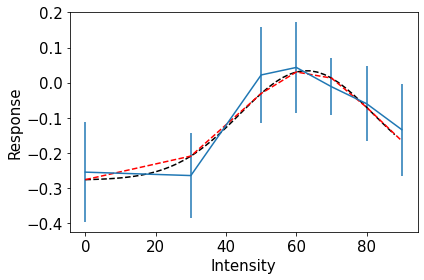

dataset 8 cell 45 params [-0.1375149091250496, 23.85294994922457, 16.482626654942827] MI 0.35029444524770625 Interpolated error -0.009273042389562725


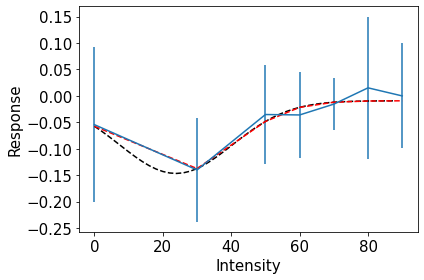

dataset 8 cell 41 params [0.19969085918586277, 22.628076209080774, 20.606305875952668] MI 0.3582638452197486 Interpolated error -0.04914521530137564


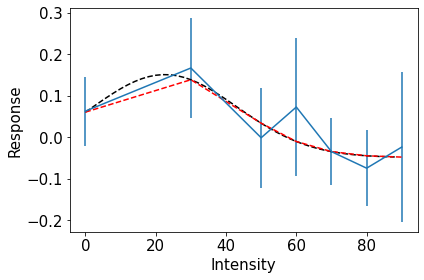

dataset 8 cell 37 params [-0.46714733458556895, 41.39356053153067, 10.08635601726418] MI 0.37164663094467804 Interpolated error 0.22847740415038598


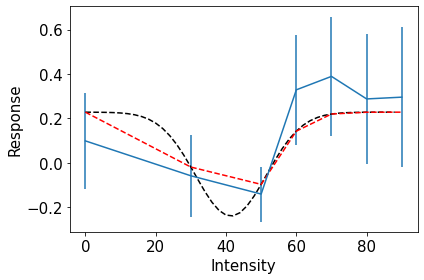

dataset 8 cell 27 params [-0.1405017533142537, 58.5681842961867, 4.938188731696468] MI 0.4555801169190899 Interpolated error 0.05058479342819827


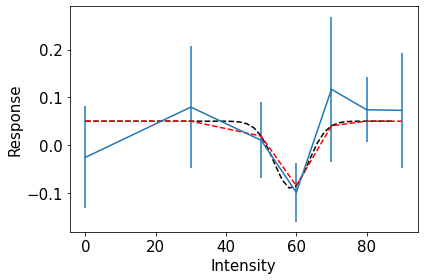

dataset 8 cell 18 params [-0.4707806171412019, 51.93633966484893, 5.018641469644275] MI 0.6142257983839265 Interpolated error 0.1903659080400359


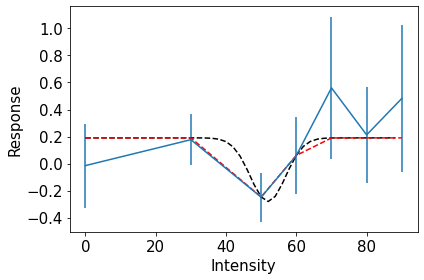

dataset 8 cell 11 params [0.27965145670679453, 51.381258368359326, 27.06770112576296] MI 0.3814903764101105 Interpolated error -0.2640333476251689


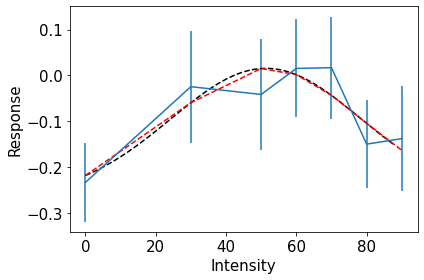

dataset 8 cell 9 params [0.3692321262392757, 61.79447732147562, 7.102349951523157] MI 0.07764908907697583 Interpolated error -0.05011701166426757


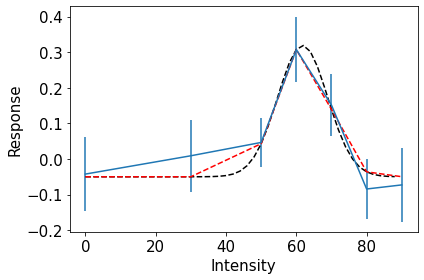

dataset 9 cell 192 params [-0.2286893528125203, 78.32098469289181, 12.303070661769642] MI 0.2465953978214873 Interpolated error 0.11838405741609101


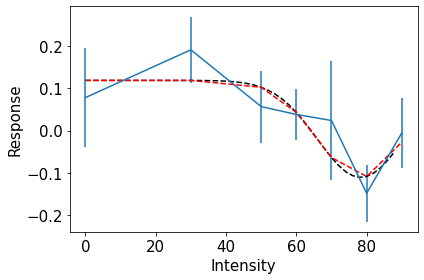

dataset 9 cell 185 params [-0.14255962476532025, 23.09224994405731, 15.481263915792685] MI 0.4322859226356063 Interpolated error 0.028470683070713695


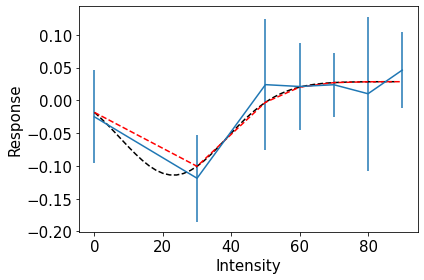

dataset 9 cell 181 params [0.11252719693371951, 54.436669915497255, 7.288357801967697] MI 0.06361024653238433 Interpolated error -0.07351056538510786


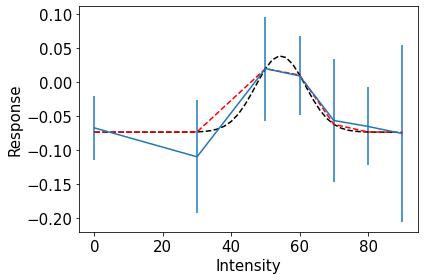

dataset 9 cell 173 params [0.18061612191008644, 70.40254845020883, 6.255348239406361] MI 0.2707481717284136 Interpolated error -0.06154146531190776


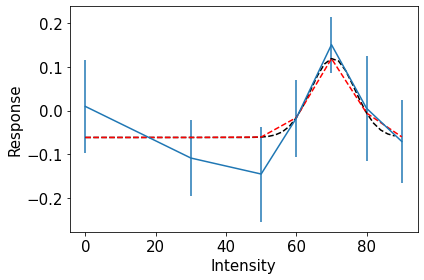

dataset 9 cell 164 params [-0.1900802717904368, 62.458467417966105, 13.834598447002568] MI 0.1810681526639665 Interpolated error 0.005013782290077074


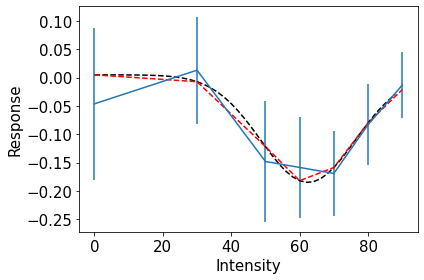

dataset 9 cell 158 params [-0.20454066474371424, 67.78224192485771, 5.196882863230158] MI 0.16914472924336058 Interpolated error 0.02305307740262025


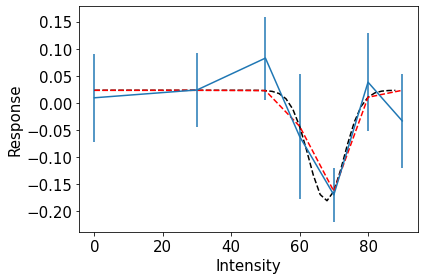

dataset 9 cell 154 params [0.15910960921770875, 65.38026024920515, 17.546366219700868] MI 0.4526511191078686 Interpolated error -0.08153645266859197


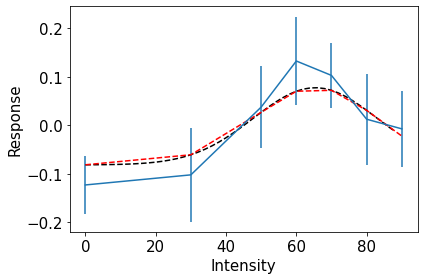

dataset 9 cell 141 params [0.21681682617292447, 29.12191843024388, 16.041131032328693] MI 0.10002566413633544 Interpolated error -0.017953964366623127


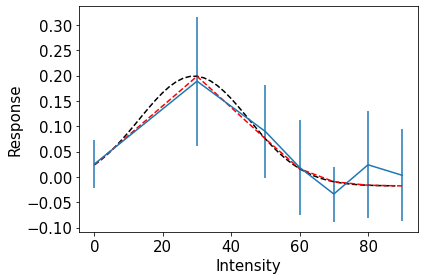

dataset 9 cell 140 params [0.2420150072130951, 53.923879929741126, 9.634580907973692] MI 0.037433267941306705 Interpolated error -0.1849200914193453


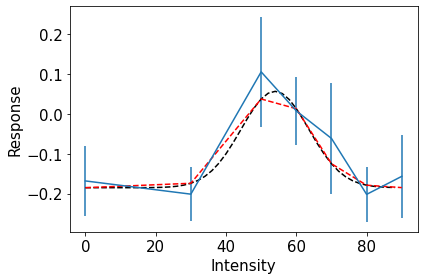

dataset 9 cell 138 params [0.09171766674702109, 71.20082936083041, 5.724949394026632] MI 0.0931819095173386 Interpolated error 0.012498336177300125


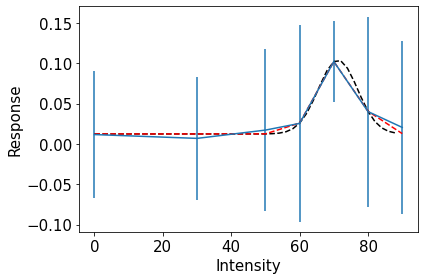

dataset 9 cell 132 params [0.3022673445180886, 45.61060648245477, 7.894141779092733] MI 0.17911837564748492 Interpolated error -0.20842217425192844


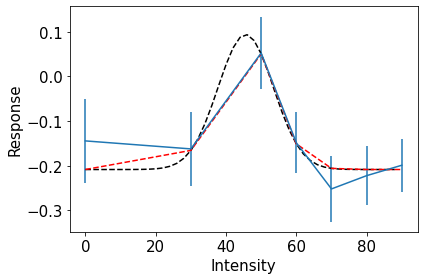

dataset 9 cell 120 params [-0.2624826383200822, 73.16622439466441, 8.080480427217935] MI 0.0846343980453729 Interpolated error -0.007214928011663163


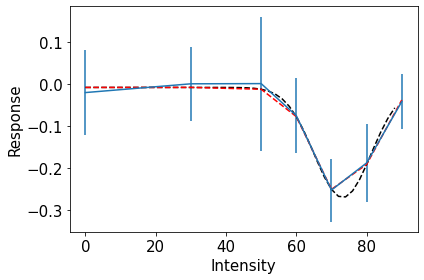

dataset 9 cell 119 params [-0.16045693832276223, 65.0100261828429, 9.232456665164603] MI 0.38557752094195447 Interpolated error 0.0760071383499746


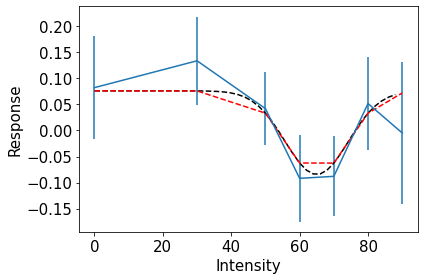

dataset 9 cell 115 params [-0.24282861954519286, 46.327818440878076, 8.577127636269704] MI 0.4945616153552604 Interpolated error 0.008081005249671647


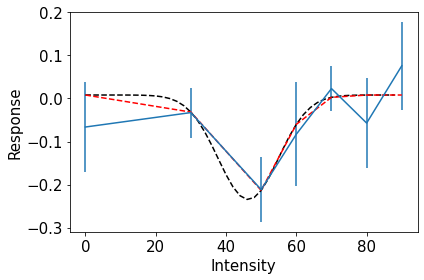

dataset 9 cell 114 params [-0.4415750836364074, 55.70692684306793, 53.18995389368467] MI 0.3787396906371914 Interpolated error 0.07510630823684361


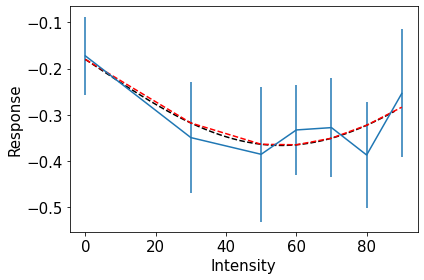

dataset 9 cell 102 params [-0.2126220787663844, 19.1388504536636, 14.556639056737282] MI 0.2787649635498503 Interpolated error -0.10321261579098508


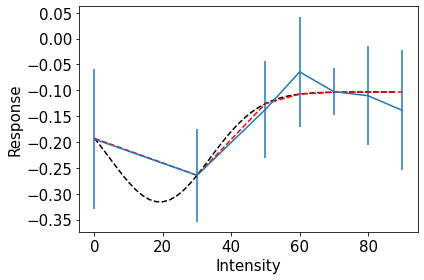

dataset 9 cell 87 params [0.24648941873197686, 29.999928625546058, 3.300000002002203] MI 0.3461308058652285 Interpolated error -0.057067553961077766


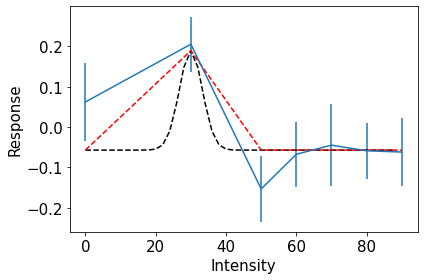

dataset 9 cell 84 params [-0.3069237975319103, 47.766302459765036, 12.395946442193983] MI 0.12367871806952936 Interpolated error 0.06753636368171942


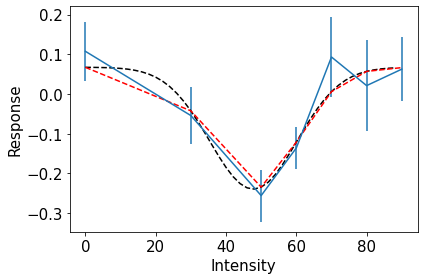

dataset 9 cell 81 params [-0.3317410651136631, 68.51279925093704, 4.80972295580984] MI 0.17483578278852094 Interpolated error 0.04260302781249468


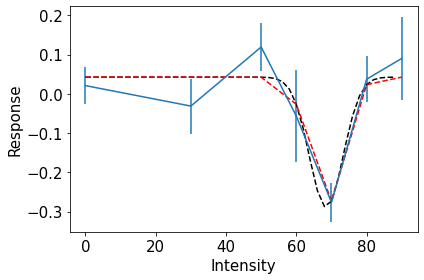

dataset 9 cell 75 params [0.23302793826222204, 42.21750371271125, 11.502154115354006] MI 0.4997954386334343 Interpolated error -0.1443431286065097


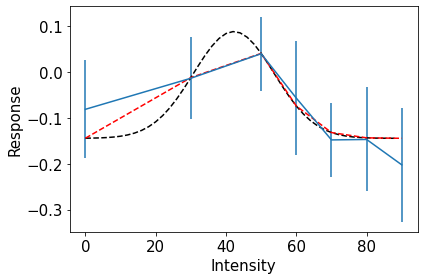

dataset 9 cell 54 params [0.21834213556798643, 56.73655425350679, 9.257266107780001] MI 0.37991624253322703 Interpolated error -0.031727423241929995


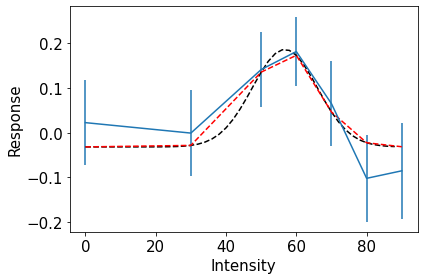

dataset 9 cell 51 params [-0.1816046456991681, 73.13305110794589, 8.365025756500296] MI 0.03812126954455699 Interpolated error -0.005740681497716232


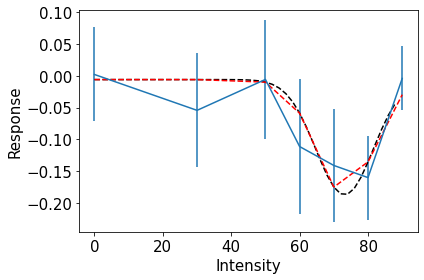

dataset 9 cell 41 params [0.2728397866476616, 40.482734344039855, 10.329634605270368] MI 0.399696662037847 Interpolated error -0.2033991991567352


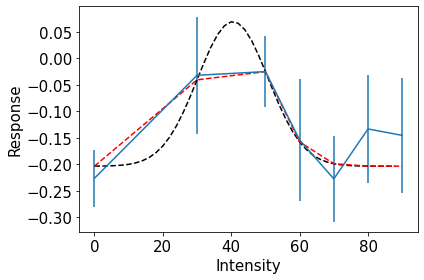

dataset 9 cell 21 params [0.22330856041830663, 36.21623222720291, 42.45562362982944] MI 0.6282392706033869 Interpolated error -0.22651458102840116


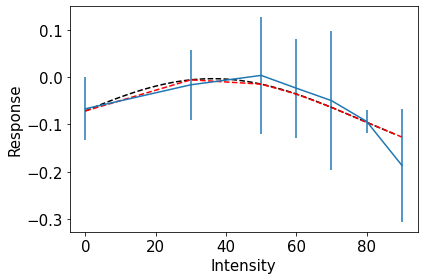

dataset 9 cell 16 params [-0.38756249179384383, 57.78406590796974, 4.435758060600818] MI 0.2730388898781635 Interpolated error 0.01615274373276349


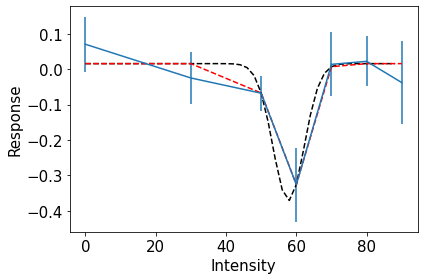

dataset 9 cell 12 params [-0.2604392412579455, 69.23456988819355, 9.843659717323114] MI 0.14141665575309026 Interpolated error 0.016190272661823945


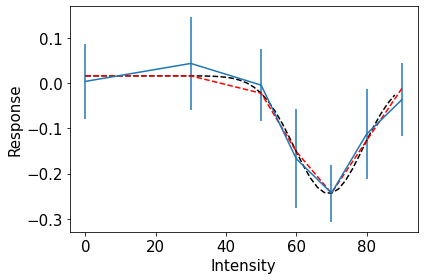

dataset 9 cell 7 params [-0.2867071533531151, 34.191050206393676, 8.845978619297505] MI 0.13187868722311177 Interpolated error 0.0189544766681678


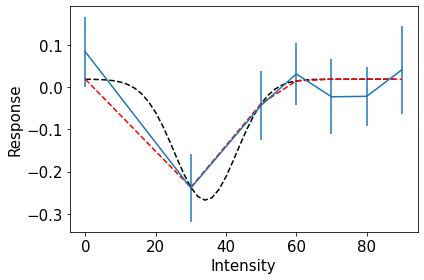

dataset 9 cell 3 params [0.20411398271081074, 60.5409597775518, 7.559323715862627] MI 0.3771686522533684 Interpolated error -0.09996695566818968


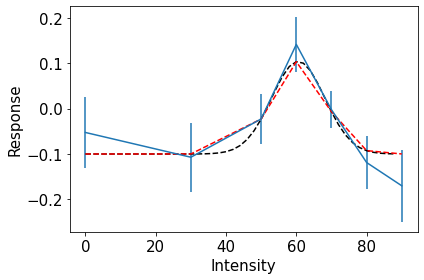

dataset 10 cell 102 params [0.24863506471704683, 48.06764313692333, 3.3000205355878065] MI 0.0658158722806807 Interpolated error 0.004952635495399257


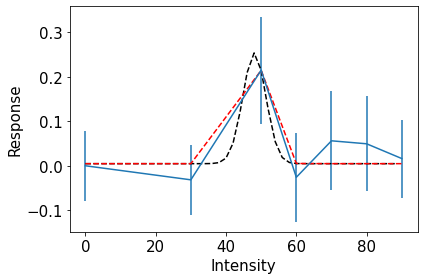

dataset 10 cell 91 params [-0.14171671921737916, 74.45839000331517, 4.458907501115946] MI 0.4129663676144512 Interpolated error -0.07090621625805303


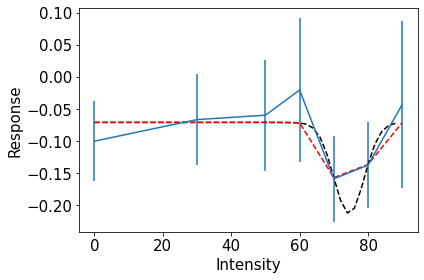

dataset 10 cell 87 params [0.19797225321203252, 54.92376509508607, 36.13141040636577] MI 0.4820633004324585 Interpolated error -0.04903741740816384


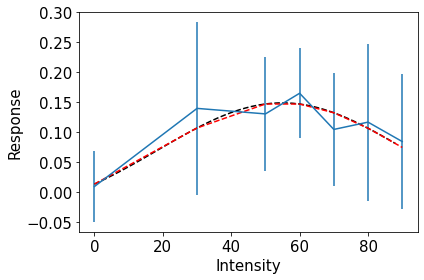

dataset 10 cell 85 params [-0.17464432659536727, 52.665608023688236, 6.304468745079017] MI 0.022677232743461315 Interpolated error 0.07471663666337718


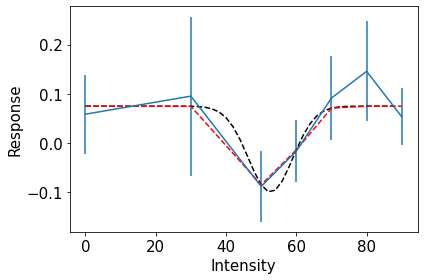

dataset 10 cell 73 params [0.3194179065455138, 44.690141549679836, 15.15792828140022] MI 0.16769595992257008 Interpolated error -0.11519309235098696


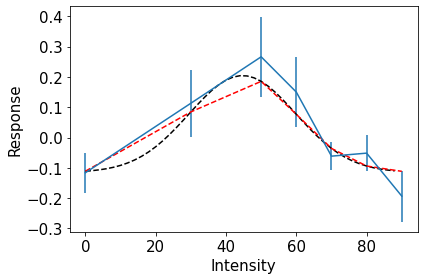

dataset 10 cell 58 params [0.24172592093873024, 50.78350003534509, 5.917117130821323] MI 0.10251637376465067 Interpolated error -0.07328087992454915


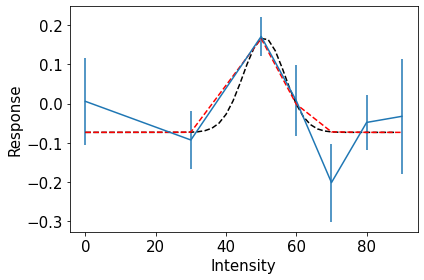

dataset 10 cell 55 params [0.24488865165772541, 22.412241895730173, 19.622400465578853] MI 0.41565096032048393 Interpolated error -0.05975891836736658


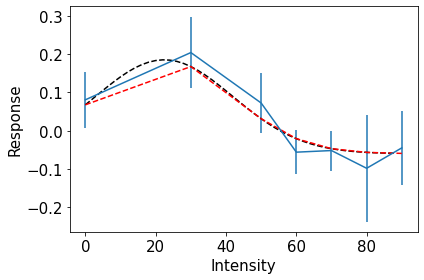

dataset 10 cell 52 params [-0.20365507932039642, 53.352133661773735, 19.570859255129662] MI 0.15852041618163457 Interpolated error 0.04360417057651179


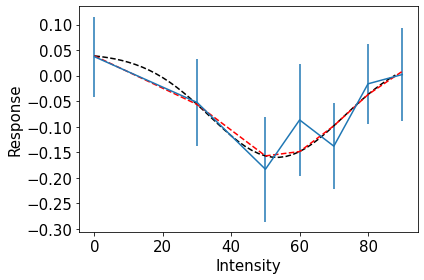

dataset 10 cell 36 params [0.2464294700138505, 67.18853159166258, 10.019230496470977] MI 0.34151795489589626 Interpolated error -0.15677971580164393


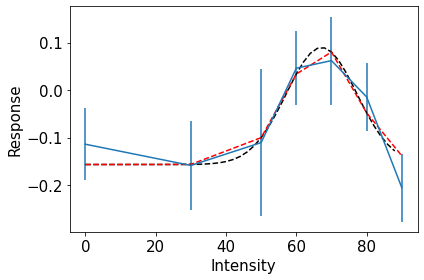

dataset 10 cell 22 params [-0.1220142074148025, 57.181765950188556, 4.989984681066647] MI 0.08881064825056079 Interpolated error -0.10608849103363759


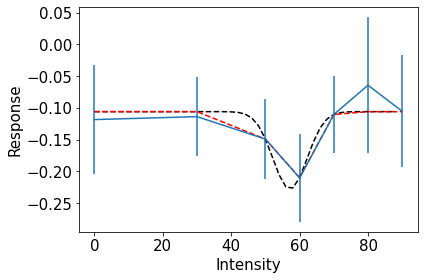

dataset 11 cell 18 params [0.18662517461779674, 57.51587330461034, 6.9866069252020155] MI 0.04135751779008546 Interpolated error -0.12778520293547893


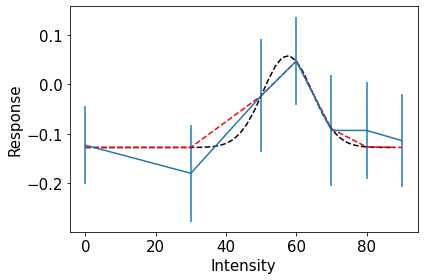

dataset 11 cell 37 params [0.18184851869891233, 40.47104461003349, 12.074516623751842] MI 0.32004300630665206 Interpolated error -0.003258107843001994


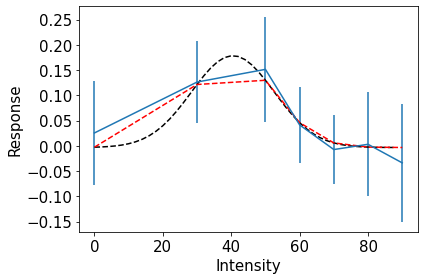

dataset 11 cell 40 params [-0.21805369871918873, 57.282716359951365, 9.607034426491845] MI 0.04150560098020962 Interpolated error 0.004314321810987077


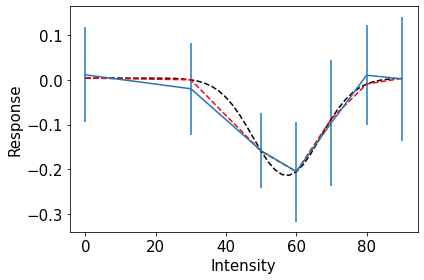

dataset 11 cell 41 params [2.5566068464238336, 54.84743571326888, 117.80663146082179] MI 0.42611645007090165 Interpolated error -0.4786960719255845


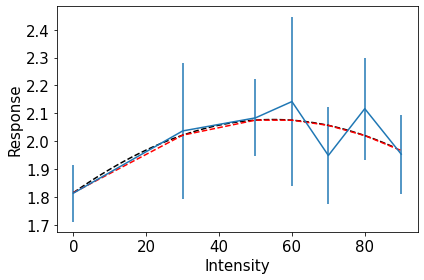

dataset 11 cell 44 params [-0.23486513942943268, 79.8623560487198, 3.3000235015616113] MI 0.09880843652752871 Interpolated error 0.07762317772657033


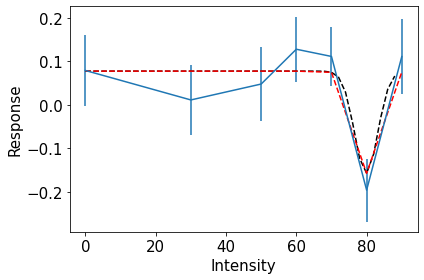

dataset 11 cell 60 params [0.22580415742665724, 29.999998398960603, 3.3000405383929095] MI 0.09742265285005586 Interpolated error -0.10611809124460184


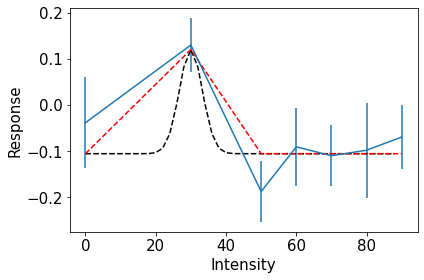

dataset 11 cell 100 params [-0.17297065081076526, 49.97657422529181, 5.928423491047387] MI 0.19931785028244645 Interpolated error -0.1294953507954065


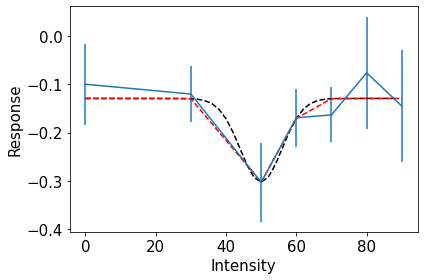

dataset 11 cell 102 params [1.1001001137971635, 51.45423898515439, 62.1826364951215] MI 0.39659603371617413 Interpolated error -0.21603468968338446


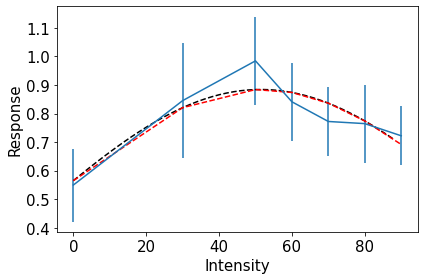

dataset 11 cell 114 params [0.13053576428130576, 24.93084595435098, 25.594700891149714] MI 0.6191374025376464 Interpolated error -0.03606474056059618


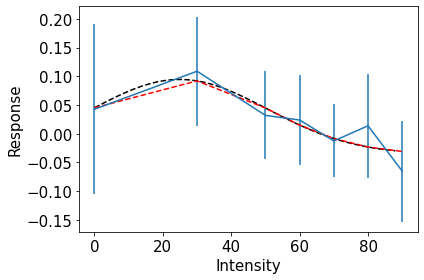

dataset 11 cell 125 params [-0.1222421439443181, 58.85070745514256, 10.776733802288591] MI 0.23239273811312267 Interpolated error -0.074230743893579


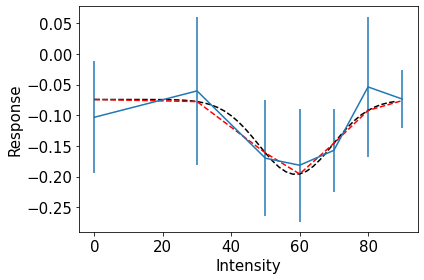

dataset 11 cell 127 params [-0.22687232277083239, 76.55105251977416, 9.177869419558641] MI 0.46095572849881966 Interpolated error 0.028754567430466765


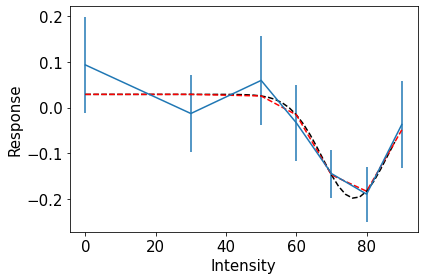

dataset 11 cell 129 params [0.13491978535357485, 58.61706272516279, 9.697580024165998] MI 0.1520143742328574 Interpolated error -0.07225852213957717


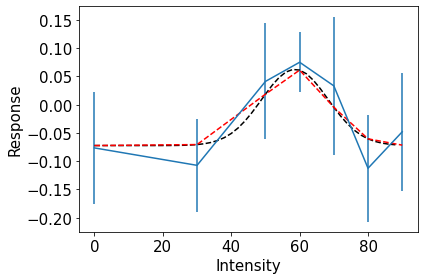

dataset 12 cell 118 params [-0.23586640078557383, 62.982178508422784, 13.310535734089527] MI 0.014340785148252303 Interpolated error 0.08647543879509664


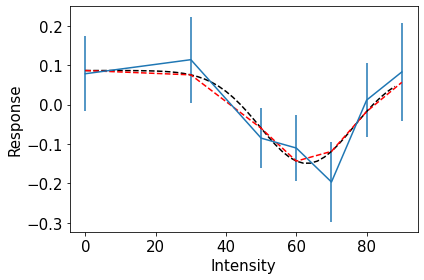

dataset 12 cell 116 params [0.19104770779217856, 60.645314874956064, 9.066172765214429] MI 0.013665647959019776 Interpolated error -0.03192799685518425


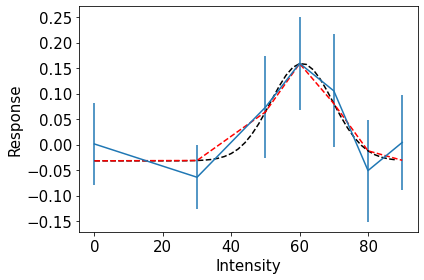

dataset 12 cell 100 params [0.2544372105741398, 68.62234651120075, 10.517438174131412] MI 0.015810513699421328 Interpolated error -0.0872911811866504


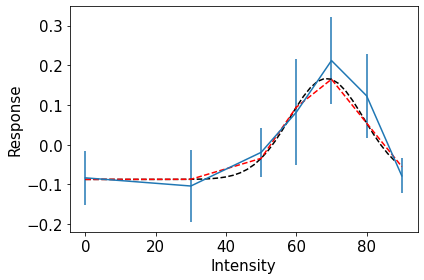

dataset 12 cell 94 params [-0.2697817146100675, 43.2580955620731, 7.112305355229805] MI 0.40294965893914647 Interpolated error -0.046071951455408


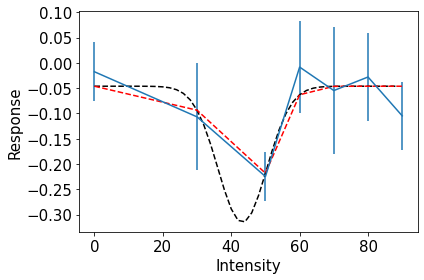

dataset 12 cell 89 params [0.11826817006570636, 50.01630068900001, 4.296540894091775] MI 0.2956264388305122 Interpolated error -0.08379103775082289


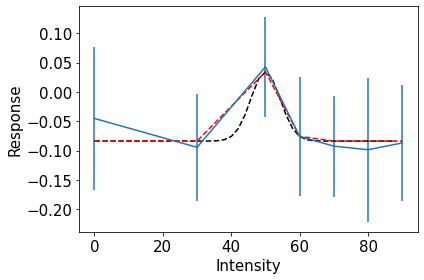

dataset 12 cell 80 params [-0.24199225171416455, 73.57095590165875, 5.522850451437537] MI 0.17505304639859307 Interpolated error -0.017489804688298517


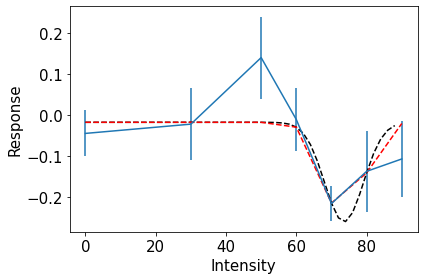

dataset 12 cell 59 params [-0.19579947139019444, 48.08285567726486, 17.745671014638344] MI 0.2507490449830494 Interpolated error -0.042378336858154085


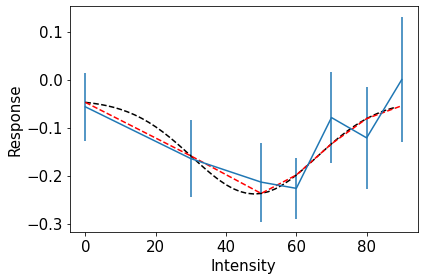

dataset 12 cell 57 params [-0.121427381866701, 59.87385002471544, 14.273017687085567] MI 0.44174796887632867 Interpolated error 0.058584699783934886


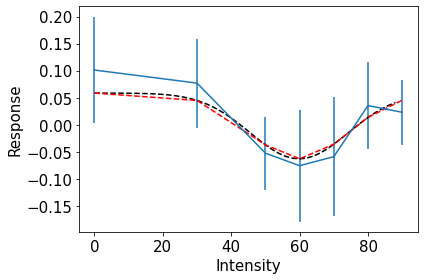

dataset 12 cell 45 params [-0.31469115744960746, 41.46945922845289, 10.006212665084544] MI 0.4257282608953487 Interpolated error -0.09298614973622887


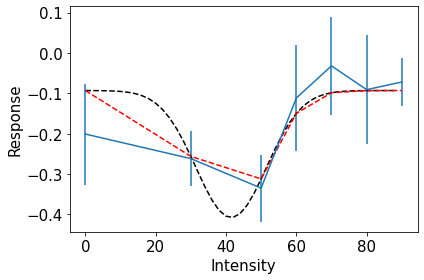

dataset 12 cell 38 params [0.2757814428581641, 27.527392755997205, 18.259075515560635] MI 0.2729202252288566 Interpolated error -0.0629019148292563


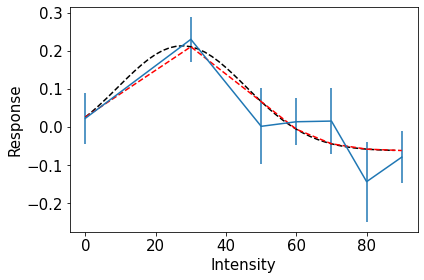

dataset 12 cell 31 params [-0.26614007798304923, 65.82092865148807, 12.164505844558413] MI 0.1192973562513471 Interpolated error 0.14127578373549093


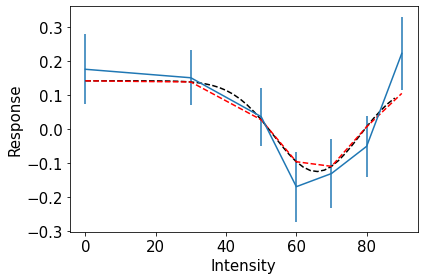

dataset 12 cell 9 params [-0.3363203562860109, 66.82679065005793, 10.541651772590752] MI 0.010479067999145986 Interpolated error 0.06589911295083042


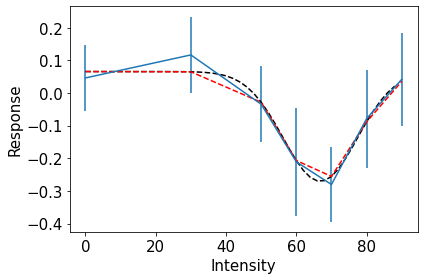

In [5]:
"""
Finding cells that were well fit by gaussian function.
"""
for icell in range(len(gaussHighLight)):
    dataset = int(gaussHighLight[icell,0])
    cell = int(gaussHighLight[icell,1])
    indices = selectingIndices(lightCondition='high')
    if (gaussHighLight[icell,5]<=0.25):
        avgResponse = responseMatrix['Ind_CellSelectionIncludingSEM'][dataset,0][indices,cell]
        semResponse = responseMatrix['Ind_CellSelectionIncludingSEM'][dataset,1][indices,cell]
        
        plt.figure()
        plt.errorbar(amplitude, avgResponse, yerr=semResponse)
        [amp,mean,std,shift] = gaussHighLight[icell,2:6]
        y = shift+amp*np.exp(-(x_sampled-mean)**2/(2*std**2))
        plt.plot(x_sampled, y,'k--') 
        y = shift+amp*np.exp(-(amplitude-mean)**2/(2*std**2))
        plt.plot(amplitude, y,'r--') 
        plt.xlabel('Intensity',fontsize=15)
        plt.ylabel('Response',fontsize=15)
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
        plt.tight_layout()
        print('dataset',dataset,'cell',cell,
              'params',[amp,mean,std], 
              'MI',monotonicity_rawData(avgResponse), 
              'Interpolated error', gaussHighLight[icell,5])
        plt.show()

In [ ]:
"""
Looking at responses of cells that were originally fit by sigmoid but then were better fit by gaussian on 
introduction of an intercept for the gaussian function. 
"""
dataset = 4
cell = 168
indices = selectingIndices(lightCondition='no')
avgResponse = responseMatrix['Ind_CellSelectionIncludingSEM'][dataset,0][indices,cell]
semResponse = responseMatrix['Ind_CellSelectionIncludingSEM'][dataset,1][indices,cell]
plt.figure()
plt.errorbar(amplitude, avgResponse, yerr=semResponse)

dataset 0 cell 67 params [0.03544646516315191, 0.21482485426214581, -2.524550540131319, -5.816434299170289] MI 0.5884846672761347 Interpolated error 0.13802005662641526


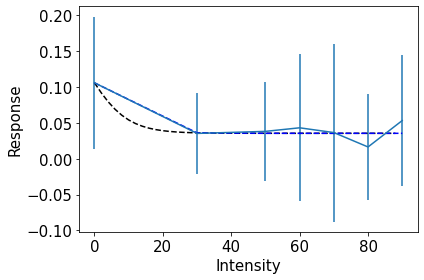

dataset 0 cell 36 params [-0.0779981168708191, 0.1324569584198098, 7.373902158851162, 5.00003479074116] MI 0.55142369311452 Interpolated error 0.07646516949553442


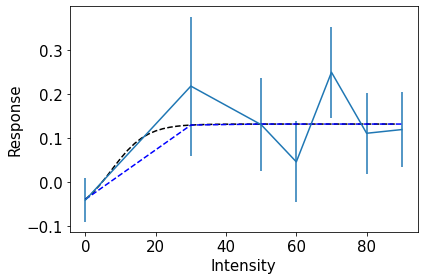

dataset 3 cell 132 params [-0.24165507523554397, 0.039994199091352746, 27.032380573127277, -5.000052359639939] MI 1.0 Interpolated error 0.058113808737302645


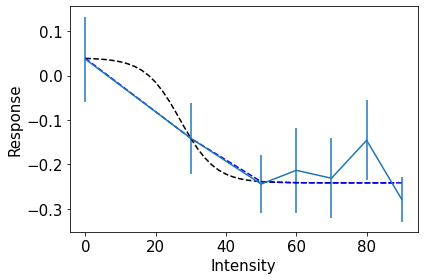

dataset 3 cell 69 params [-0.07528616469465318, 0.5775254522031789, 25.367950225255818, 5.000038934822822] MI 1.0 Interpolated error 0.06109014437460027


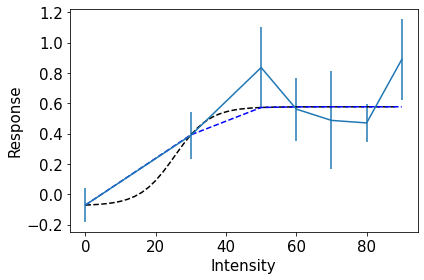

dataset 3 cell 21 params [-0.07745966635854569, 0.5329280604093282, 5.501553334884426, -5.000063678769818] MI 0.9484057142544599 Interpolated error 0.10200044111357938


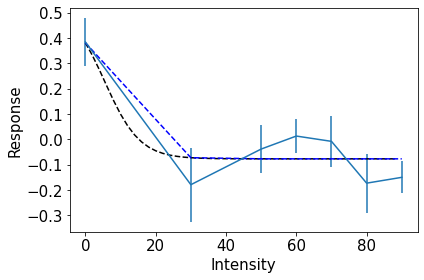

dataset 5 cell 215 params [0.010818872070811145, 0.5995509840995863, -0.4566114138489659, -5.000065611229368] MI 0.9818371920478699 Interpolated error 0.15704239110302048


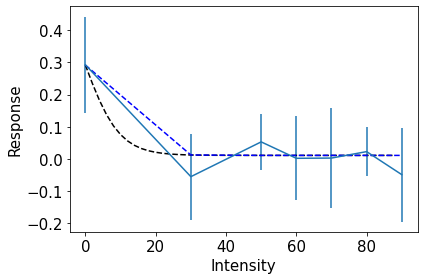

dataset 5 cell 26 params [-0.21394057197158547, 0.3041939584469016, 1.0411955925893288, -5.000060650023572] MI 0.9498519354335966 Interpolated error 0.14712017346749304


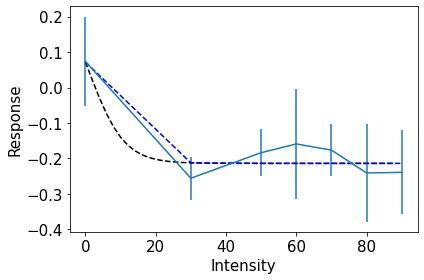

dataset 6 cell 185 params [-0.27552997833010817, 0.044974900691573706, 5.578080706063649, 5.000049893563247] MI 0.487385770749348 Interpolated error 0.10101892088756495


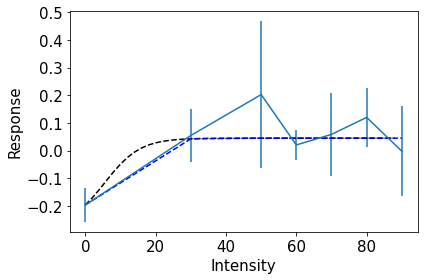

dataset 6 cell 5 params [-0.29530067151150763, -0.12691663177733023, 5.9776708555708, 5.000064547081258] MI 0.6682740216253965 Interpolated error 0.09579288395545127


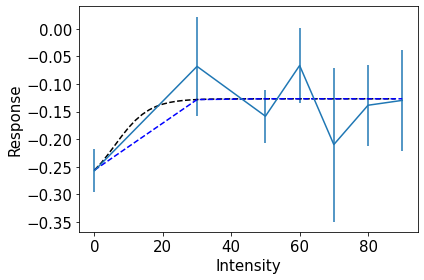

dataset 7 cell 163 params [-0.0069232695732341165, 0.3158336600277128, 2.399737970000561, -6.133510096547155] MI 0.5085388547190439 Interpolated error 0.09432479970350596


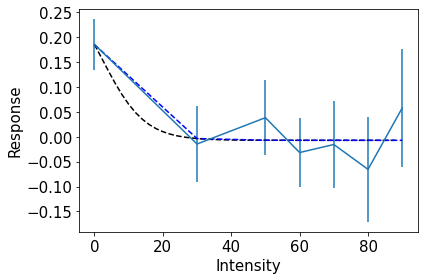

dataset 7 cell 110 params [0.006933543418386896, 0.15318248866305506, -1.2187730480309813, -5.05548509815132] MI 0.6454639643178663 Interpolated error 0.1591671693799671


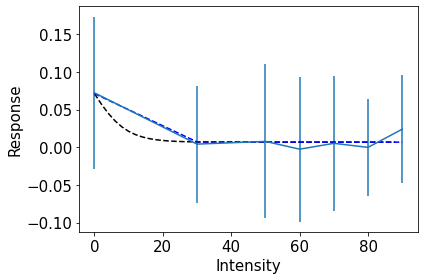

dataset 8 cell 96 params [-0.21049409521346293, 0.09242061086137031, 7.610579481241574, 5.000056941284614] MI 0.7962980966346104 Interpolated error 0.07306903510003572


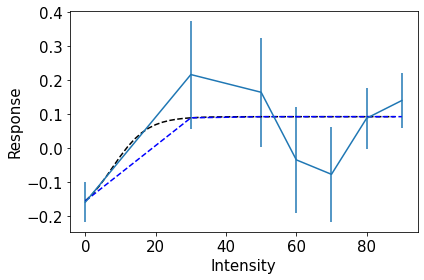

dataset 9 cell 109 params [-0.021159234434959748, 0.2086893406253784, 23.958460434855493, -5.0000412154129155] MI 0.8266207576612442 Interpolated error 0.059271618116572625


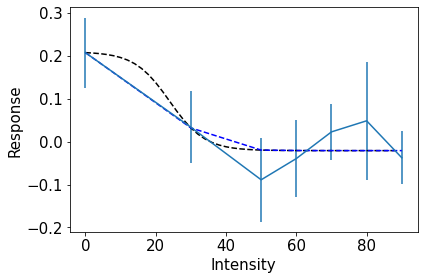

dataset 9 cell 1 params [-0.264089346864371, 0.03953365166904147, 23.7854430180514, 5.000047546755981] MI 0.7570669548212441 Interpolated error 0.058740469973990184


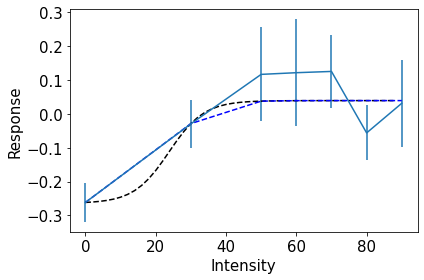

dataset 10 cell 90 params [-0.30710838992740364, 0.0706678904987402, 8.81443449498758, 5.000055871042465] MI 0.6171848517680009 Interpolated error 0.05564672791633153


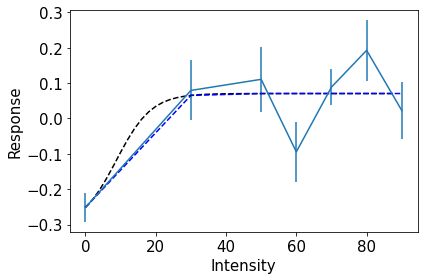

dataset 10 cell 81 params [-0.22457176279608, 0.08012075452370077, 4.241706553743243, 5.0000308742677255] MI 0.934203281089211 Interpolated error 0.11721647425843248


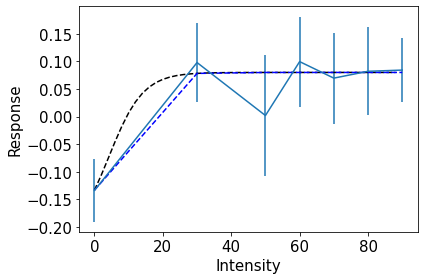

dataset 11 cell 24 params [-0.3144909307881224, 0.003459002334062037, 3.7925932629889068, 5.000057919094346] MI 0.5597071838507494 Interpolated error 0.12217760821025153


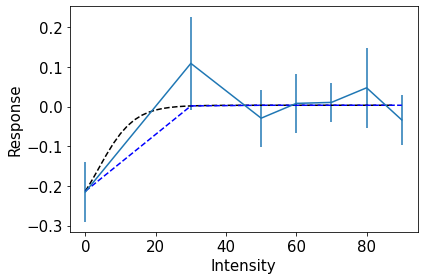

In [8]:
"""
Finding cells that were well fit by sigmoid function.
"""
for icell in range(len(sigmoidNoLight)):
    dataset = int(sigmoidNoLight[icell,0])
    cell = int(sigmoidNoLight[icell,1])
    indices = selectingIndices(lightCondition='no')
    if sigmoidNoLight[icell,6]>=0.05:
        avgResponse = responseMatrix['Ind_CellSelectionIncludingSEM'][dataset,0][indices,cell]
        semResponse = responseMatrix['Ind_CellSelectionIncludingSEM'][dataset,1][indices,cell]
        
        plt.figure()
        plt.errorbar(amplitude, avgResponse, yerr=semResponse)
        [y0, ymax, x0, delta_x] = sigmoidNoLight[icell,2:6]
        y = y0 + (ymax-y0)/(1+np.exp((x0-x_sampled)/delta_x))
        plt.plot(x_sampled, y,'k--') 
        y = y0 + (ymax-y0)/(1+np.exp((x0-amplitude)/delta_x))
        plt.plot(amplitude, y,'b--') 
        plt.xlabel('Intensity',fontsize=15)
        plt.ylabel('Response',fontsize=15)
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
        plt.tight_layout()
        print('dataset',dataset,'cell',cell,
              'params',[y0, ymax, x0, delta_x], 
              'MI',monotonicity_rawData(avgResponse), 
              'Interpolated error', sigmoidNoLight[icell,6])
        plt.show()

In [ ]:
"""
Finding cells that are fit in all three light conditions.
"""

#chosenNoLightCells = np.append(gaussNoLight[:,:2][gaussNoLight[:,5]<0.25],
#                               sigmoidNoLight[:,:2][sigmoidNoLight[:,6]<0.05],axis=0)

#chosenMidLightCells = np.append(gaussMidLight[:,:2][gaussMidLight[:,5]<0.25],
#                                sigmoidMidLight[:,:2][sigmoidMidLight[:,6]<0.05],axis=0)

#chosenHighLightCells = np.append(gaussHighLight[:,:2][gaussHighLight[:,5]<0.25],
#                                 sigmoidHighLight[:,:2][sigmoidHighLight[:,6]<0.05],axis=0)
chosenNoLightCells = gaussNoLight[:,:-1][gaussNoLight[:,5]<0.25]
chosenMidLightCells = gaussMidLight[:,:-1][gaussMidLight[:,5]<0.25]
chosenHighLightCells = gaussHighLight[:,:-1][gaussHighLight[:,5]<0.25]

def customSort(cells):
        return [cells[0],cells[1]]
noLightCellsSorted = sorted(chosenNoLightCells,key=customSort)
midLightCellsSorted = sorted(chosenMidLightCells,key=customSort)
highLightCellsSorted = sorted(chosenHighLightCells,key=customSort)

def intersection(array1, array2, array3):
    cnt = 0
    for dataset in range(16):
        commonCells = np.intersect1d(array1[array1[:,0]==dataset,1],array2[array2[:,0]==dataset,1])
        for cell in commonCells:
            lightConditions = ['no','high']
            icellNo = np.intersect1d(np.where(array1[:,0]==dataset),np.where(array1[:,1]==cell))
            icellLight = np.intersect1d(np.where(array2[:,0]==dataset),np.where(array2[:,1]==cell))
            if array1[icellNo,2] > 0:
                plt.figure()
                for lightcond in lightConditions:
                    index = selectingIndices(lightCondition=lightcond)
                    avgResponse = responseMatrix['Ind_CellSelectionIncludingSEM'][dataset,0][index,int(cell)]
                    semResponse = responseMatrix['Ind_CellSelectionIncludingSEM'][dataset,1][index,int(cell)]
                    plt.errorbar(amplitude, avgResponse, yerr=semResponse)
                    [amp,mean,std,shift] = array1[icellNo,2:6][0]
                    y = shift+amp*np.exp(-(x_sampled-mean)**2/(2*std**2))
                    plt.plot(x_sampled, y,'k--') 
                    [amp,mean,std,shift] = array2[icellLight,2:6][0]
                    y = shift+amp*np.exp(-(x_sampled-mean)**2/(2*std**2))
                    plt.plot(x_sampled, y,'k.') 
                plt.show()
                cnt += 1
    print(cnt)

intersection(chosenNoLightCells, chosenHighLightCells, chosenMidLightCells)


In [ ]:
fig, [ax1,ax2,ax3] = plt.subplots(1,3,figsize=(20,5))
indices = selectingIndices(lightCondition='no')
avgResponse = responseMatrix['Ind_CellSelectionIncludingSEM'][2,0][indices,91]
semResponse = responseMatrix['Ind_CellSelectionIncludingSEM'][2,1][indices,91]
ax1.errorbar(amplitude, avgResponse, yerr=semResponse)
icell = 42
[y0, ymax, x0, delta_x] = sigmoidNoLight[icell,2:6]
y = y0 + (ymax-y0)/(1+np.exp((x0-x_sampled)/delta_x))
ax1.plot(x_sampled, y,'k--') 
y = y0 + (ymax-y0)/(1+np.exp((x0-amplitude)/delta_x))
ax1.plot(amplitude, y,'b--') 
ax1.set_xlabel('Intensity',fontsize=15)
ax1.set_ylabel('Response',fontsize=15)

indices = selectingIndices(lightCondition='mid')
avgResponse = responseMatrix['Ind_CellSelectionIncludingSEM'][2,0][indices,91]
semResponse = responseMatrix['Ind_CellSelectionIncludingSEM'][2,1][indices,91]
ax2.errorbar(amplitude, avgResponse, yerr=semResponse)
icell = 37
[y0, ymax, x0, delta_x] = sigmoidMidLight[icell,2:6]
y = y0 + (ymax-y0)/(1+np.exp((x0-x_sampled)/delta_x))
ax2.plot(x_sampled, y,'k--') 
y = y0 + (ymax-y0)/(1+np.exp((x0-amplitude)/delta_x))
ax2.plot(amplitude, y,'b--') 
ax2.set_xlabel('Intensity',fontsize=15)
ax2.set_ylabel('Response',fontsize=15)

indices = selectingIndices(lightCondition='high')
avgResponse = responseMatrix['Ind_CellSelectionIncludingSEM'][2,0][indices,91]
semResponse = responseMatrix['Ind_CellSelectionIncludingSEM'][2,1][indices,91]
ax3.errorbar(amplitude, avgResponse, yerr=semResponse)
icell = 35
[y0, ymax, x0, delta_x] = sigmoidHighLight[icell,2:6]
y = y0 + (ymax-y0)/(1+np.exp((x0-x_sampled)/delta_x))
ax3.plot(x_sampled, y,'k--') 
y = y0 + (ymax-y0)/(1+np.exp((x0-amplitude)/delta_x))
ax3.plot(amplitude, y,'b--') 
ax3.set_xlabel('Intensity',fontsize=15)
ax3.set_ylabel('Response',fontsize=15)